In [1]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from collections import Counter

# from sklearn.datasets import load_boston
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/Volumes/Debbie 1T/BDSE35-1_Final Project_2/data/房價_201010row_outlier_final_KDEclass.csv')
plt.rcParams['font.family'] = 'Heiti TC'

In [3]:
df.shape

(201010, 58)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201010 entries, 0 to 201009
Data columns (total 58 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   鄉鎮市區                  201010 non-null  object 
 1   土地位置建物門牌              201010 non-null  object 
 2   交易年月日                 201010 non-null  object 
 3   建築完成年月                173199 non-null  float64
 4   建物移轉總面積平方公尺           201010 non-null  float64
 5   有無管理組織                201010 non-null  int64  
 6   總價元                   201010 non-null  int64  
 7   單價元平方公尺               201010 non-null  float64
 8   備註                    53145 non-null   object 
 9   編號                    201010 non-null  object 
 10  緯度                    201010 non-null  float64
 11  經度                    201010 non-null  float64
 12  bad_count             201010 non-null  float64
 13  good_count            201010 non-null  float64
 14  建築型態清整                201010 non-null  object 
 15  

In [5]:
# 列出物件型變數
object_cols = df.select_dtypes(include=[np.object_]).columns.tolist()
object_cols

['鄉鎮市區', '土地位置建物門牌', '交易年月日', '備註', '編號', '建築型態清整', 'Region', '屋齡區間']

In [6]:
df.isna().sum()

鄉鎮市區                         0
土地位置建物門牌                     0
交易年月日                        0
建築完成年月                   27811
建物移轉總面積平方公尺                  0
有無管理組織                       0
總價元                          0
單價元平方公尺                      0
備註                      147865
編號                           0
緯度                           0
經度                           0
bad_count                    0
good_count                   0
建築型態清整                       0
陽台有無                         0
是否含額外土地                      0
建築型態_住商大樓                    0
建築型態_公寓                      0
建築型態_其他                      0
建築型態_透天厝                     0
房地總價元                        0
格局比例_房                       0
格局比例_廳                       0
格局比例_衛                       0
格局比例_隔間                      0
是否包含車位                       0
建材_磚石                        0
建材_鋼筋                        0
建材_鋼骨                        0
建材_竹木                        0
住                            0
商       

## y值為右偏態＆低闊峰

skewness:0.683995
kurtosis:-0.118931


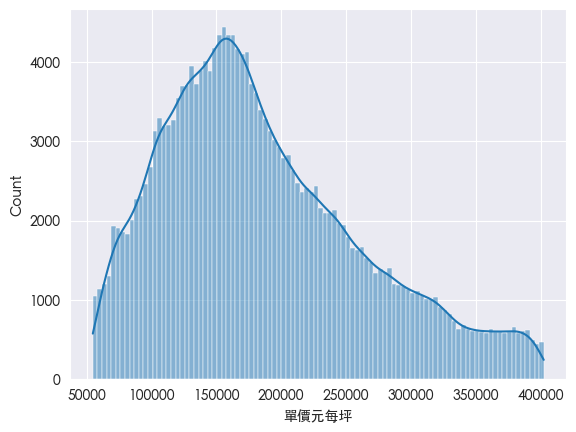

In [5]:
from scipy import stats

#計算偏度與峰度
skewness = stats.skew(df['單價元每坪'], bias=False)
kurtosis = stats.kurtosis(df['單價元每坪'], bias = False, fisher=True)
print('skewness:%f'%skewness)
print('kurtosis:%f'%kurtosis)
#劃出分配圖
sns.histplot(df['單價元每坪'], kde=True)
plt.show()


In [8]:
df.columns

Index(['鄉鎮市區', '土地位置建物門牌', '交易年月日', '建築完成年月', '建物移轉總面積平方公尺', '有無管理組織', '總價元',
       '單價元平方公尺', '備註', '編號', '緯度', '經度', 'bad_count', 'good_count', '建築型態清整',
       '陽台有無', '是否含額外土地', '建築型態_住商大樓', '建築型態_公寓', '建築型態_其他', '建築型態_透天厝',
       '房地總價元', '格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間', '是否包含車位', '建材_磚石',
       '建材_鋼筋', '建材_鋼骨', '建材_竹木', '住', '商', '工', '農', '移轉層次_騎樓', '移轉層次_屋頂',
       '移轉層次_一二樓', 'KDE_0.5km', 'KDE_1km', 'KDE_1.5km', '有無電梯', 'Region',
       '建物移轉總面積坪', '單價元每坪', '房地總價元(坪)', '交易年份', '建築完成年', '交易年_民國', '屋齡',
       '屋齡區間', 'good_count_0_500', 'good_count_500_1000',
       'good_count_1000_1500', 'bad_count_0_500', 'bad_count_500_1000',
       'bad_count_1000_1500', 'KDE_class'],
      dtype='object')

In [9]:
# 列出數值型變數
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols

['建築完成年月',
 '建物移轉總面積平方公尺',
 '有無管理組織',
 '總價元',
 '單價元平方公尺',
 '緯度',
 '經度',
 'bad_count',
 'good_count',
 '陽台有無',
 '是否含額外土地',
 '建築型態_住商大樓',
 '建築型態_公寓',
 '建築型態_其他',
 '建築型態_透天厝',
 '房地總價元',
 '格局比例_房',
 '格局比例_廳',
 '格局比例_衛',
 '格局比例_隔間',
 '是否包含車位',
 '建材_磚石',
 '建材_鋼筋',
 '建材_鋼骨',
 '建材_竹木',
 '住',
 '商',
 '工',
 '農',
 '移轉層次_騎樓',
 '移轉層次_屋頂',
 '移轉層次_一二樓',
 'KDE_0.5km',
 'KDE_1km',
 'KDE_1.5km',
 '有無電梯',
 '建物移轉總面積坪',
 '單價元每坪',
 '房地總價元(坪)',
 '交易年份',
 '建築完成年',
 '交易年_民國',
 '屋齡',
 'good_count_0_500',
 'good_count_500_1000',
 'good_count_1000_1500',
 'bad_count_0_500',
 'bad_count_500_1000',
 'bad_count_1000_1500',
 'KDE_class']

In [10]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # 設定圖形大小
# plt.figure(figsize=(10, 6))

# # 繪製三個 KDE 特徵的分佈
# sns.histplot(df['KDE_0.5km'], bins=50, kde=True, color='blue', label='KDE_0.5km', stat="density")
# sns.histplot(df['KDE_1km'], bins=50, kde=True, color='orange', label='KDE_1km', stat="density")
# sns.histplot(df['KDE_1.5km'], bins=50, kde=True, color='green', label='KDE_1.5km', stat="density")


# # 添加圖例和標題
# plt.legend()
# plt.title('Histogram of KDE Features')
# plt.xlabel('Density')
# plt.ylabel('Frequency')
# plt.show()


In [11]:
# df['KDE_class'].values.tolist()

In [12]:
# # 對 bad_count 和 good_count 進行對數變換（+1 防止 0 的存在）
# df['bad_count_log'] = np.log1p(df['bad_count'])
# df['good_count_log'] = np.log1p(df['good_count'])

# # 繪製變換後的分佈
# plt.figure(figsize=(10, 6))
# sns.histplot(df['bad_count_log'], bins=50, kde=True, color='blue', label='bad_count (log)', stat="count")
# sns.histplot(df['good_count_log'], bins=50, kde=True, color='orange', label='good_count (log)', stat="count")

# # 添加圖例和標題
# plt.legend()
# plt.title('Histogram of Log-transformed good & bad facilities Features')
# plt.xlabel('Log-transformed good & bad count')
# plt.ylabel('Count')
# plt.show()


- 對數變換：將 bad_count 和 good_count 取對數平滑處理。
- 標準化：對對數變換後的特徵進行標準化，使其範圍一致。
- 截尾處理：將極端值截尾（例如大於 50 的值設為 50）以減少極端值的影響。
- 分箱處理：將 bad_count 和 good_count 分為多個區間，將這些特徵轉換成分類型變量。
- Yeo-Johnson 變換：對數據進行平滑變換，適合具有偏態分佈的特徵


In [13]:
from sklearn.preprocessing import StandardScaler, PowerTransformer

# 1. Yeo-Johnson 變換
pt = PowerTransformer(method='yeo-johnson')
df[['bad_count_yeojohnson', 'good_count_yeojohnson']] = pt.fit_transform(df[['bad_count', 'good_count']])

# 2. 標準化（可選）
scaler = StandardScaler()
df[['bad_count_yeojohnson_scaled', 'good_count_yeojohnson_scaled']] = scaler.fit_transform(df[['bad_count_yeojohnson', 'good_count_yeojohnson']])

# # 3. 截尾處理（限制極端值，若有需要）
# cap_value = 50
# df['bad_count_capped'] = df['bad_count'].apply(lambda x: min(x, cap_value))
# df['good_count_capped'] = df['good_count'].apply(lambda x: min(x, cap_value))

# # 4. 分箱處理（Binning，若有需要）
# bins = [0, 1, 5, 10, 20, 50, np.inf]
# labels = ['0', '1-5', '6-10', '11-20', '21-50', '50+']
# df['bad_count_binned'] = pd.cut(df['bad_count'], bins=bins, labels=labels)
# df['good_count_binned'] = pd.cut(df['good_count'], bins=bins, labels=labels)

# 確認生成的新欄位
print(df[['bad_count', 'good_count', 'bad_count_yeojohnson', 'good_count_yeojohnson', 
          'bad_count_yeojohnson_scaled', 'good_count_yeojohnson_scaled']].head())


   bad_count  good_count  bad_count_yeojohnson  good_count_yeojohnson  \
0        5.0         2.0              0.495215               1.271941   
1        5.0         1.0              0.495215               0.771498   
2       11.0         2.0              1.295460               1.271941   
3        2.0         1.0             -0.275684               0.771498   
4        4.0         0.0              0.289642              -0.881573   

   bad_count_yeojohnson_scaled  good_count_yeojohnson_scaled  
0                     0.495215                      1.271941  
1                     0.495215                      0.771498  
2                     1.295460                      1.271941  
3                    -0.275684                      0.771498  
4                     0.289642                     -0.881573  


In [14]:
df.columns

Index(['鄉鎮市區', '土地位置建物門牌', '交易年月日', '建築完成年月', '建物移轉總面積平方公尺', '有無管理組織', '總價元',
       '單價元平方公尺', '備註', '編號', '緯度', '經度', 'bad_count', 'good_count', '建築型態清整',
       '陽台有無', '是否含額外土地', '建築型態_住商大樓', '建築型態_公寓', '建築型態_其他', '建築型態_透天厝',
       '房地總價元', '格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間', '是否包含車位', '建材_磚石',
       '建材_鋼筋', '建材_鋼骨', '建材_竹木', '住', '商', '工', '農', '移轉層次_騎樓', '移轉層次_屋頂',
       '移轉層次_一二樓', 'KDE_0.5km', 'KDE_1km', 'KDE_1.5km', '有無電梯', 'Region',
       '建物移轉總面積坪', '單價元每坪', '房地總價元(坪)', '交易年份', '建築完成年', '交易年_民國', '屋齡',
       '屋齡區間', 'good_count_0_500', 'good_count_500_1000',
       'good_count_1000_1500', 'bad_count_0_500', 'bad_count_500_1000',
       'bad_count_1000_1500', 'KDE_class', 'bad_count_yeojohnson',
       'good_count_yeojohnson', 'bad_count_yeojohnson_scaled',
       'good_count_yeojohnson_scaled'],
      dtype='object')

## 整個特徵與房價的相關性（熱力圖）

In [6]:
import os

# 檢查並創建目錄
save_dir = '/Users/debbie/house/output_statistics'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

Top 15 Features and Correlation with Target (單價元每坪):
屋齡           0.379470
房地總價元(坪)     0.322056
是否包含車位       0.278669
建築型態_住商大樓    0.169681
有無電梯         0.169681
格局比例_廳       0.152282
KDE_class    0.100862
建材_鋼骨        0.092393
格局比例_隔間      0.087348
商            0.064985
農            0.063093
工            0.031281
格局比例_衛       0.015372
建築型態_其他      0.009345
建材_鋼筋        0.006660
Name: 單價元每坪, dtype: float64


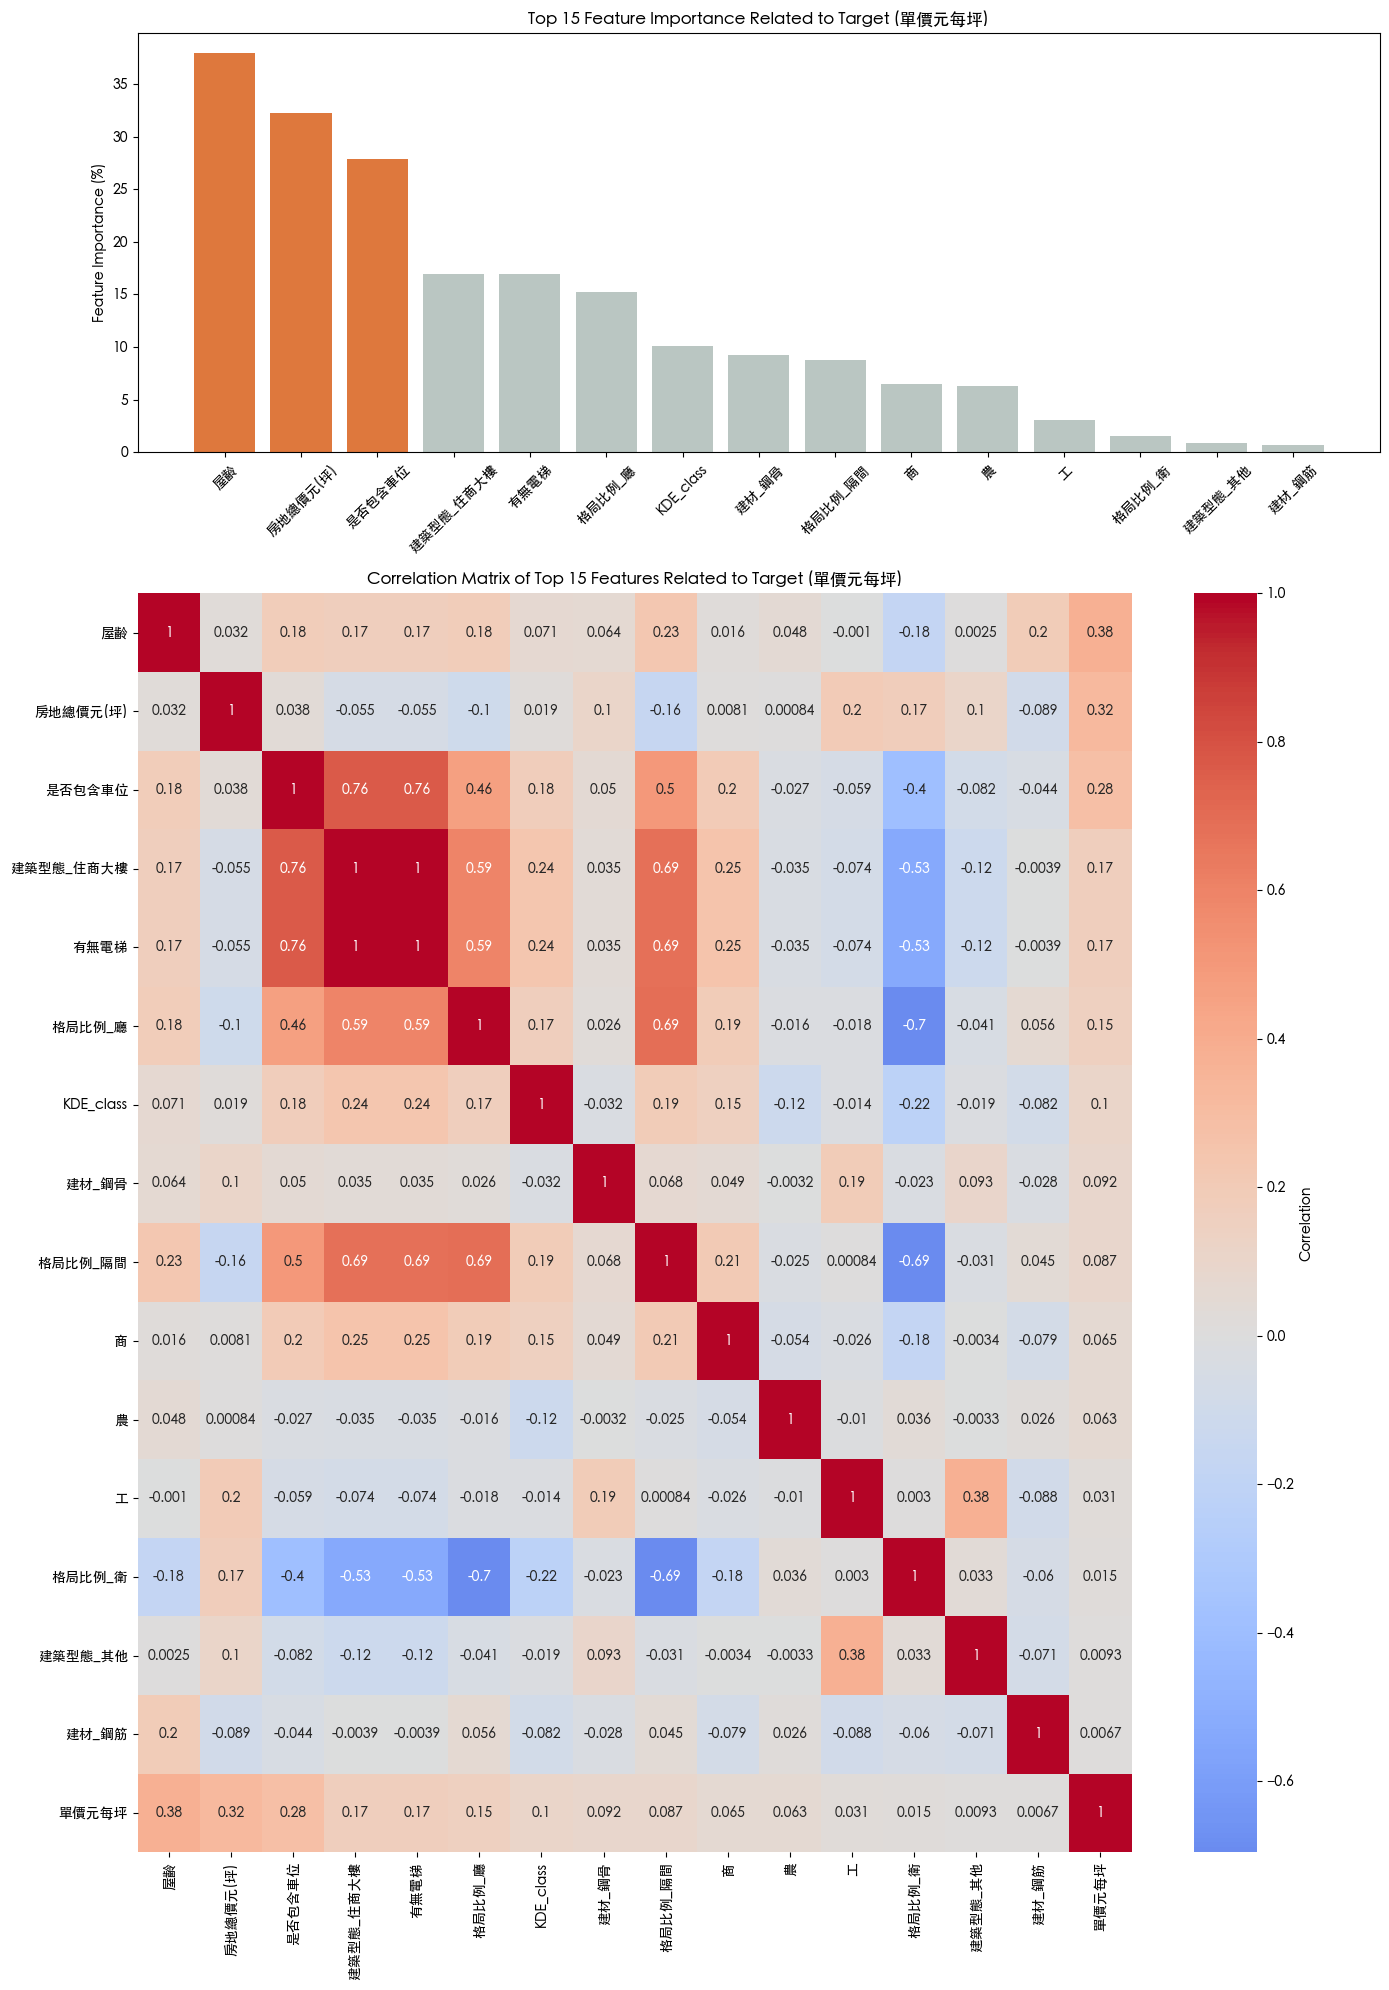

In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import StandardScaler
# import matplotlib.pyplot as plt
# import seaborn as sns


# # 1. 篩選數值型特徵
# numeric_df = df.select_dtypes(include=['int64', 'float64'])

# # 2. 要刪除的欄位列表
# columns_to_drop = [
#     '經度', '緯度', '建築完成年月', '建物移轉總面積平方公尺', '總價元', '單價元平方公尺', '建築完成年',
#     '交易年_民國', 'good_count_0_500', 'good_count_500_1000', 'good_count_1000_1500',
#     'bad_count_0_500', 'bad_count_500_1000', 'bad_count_1000_1500', '交易年份', 'bad_count_log', 'good_count_log',
#     '鄉鎮市區', '土地位置建物門牌', '交易年月日','bad_count_yeojohnson_scaled', 'good_count_yeojohnson_scaled' ,'房地總價元' 
# ]

# # 3. 從 numeric_df 刪除指定欄位
# numeric_df = numeric_df.drop(columns=columns_to_drop, errors='ignore')

# # 4. 使用均值填充缺失值
# numeric_df = numeric_df.fillna(numeric_df.mean())

# # 5. 標準化指定的數量型欄位
# quantity_columns = ['房地總價元(坪)', '建物移轉總面積坪',]
# scaler = StandardScaler()
# numeric_df[quantity_columns] = scaler.fit_transform(numeric_df[quantity_columns])

# # 6. 計算所有特徵與 y ('單價元每坪') 的相關性
# correlation_matrix = numeric_df.corr()
# target_correlation = correlation_matrix['單價元每坪'].sort_values(ascending=False)

# # 找出與 '單價元每坪' 最相關的前 15 名特徵（不包含 '單價元每坪' 本身）
# top_15_features = target_correlation.index[1:16]
# top_15_correlation_values = target_correlation[top_15_features]

# # 取出前 15 個與 '單價元每坪' 最相關的特徵
# selected_features = top_15_features.tolist() + ['單價元每坪']
# correlation_matrix_subset = correlation_matrix.loc[selected_features, selected_features]

# # 繪製長方圖來顯示前 15 個與 '單價元每坪' 最相關的特徵
# fig, (ax_bar, ax_heatmap) = plt.subplots(2, 1, figsize=(14, 20), gridspec_kw={"height_ratios": [1, 3]})

# # 長方圖設置顏色，強調前三名特徵
# colors = ['#de783d' if i < 3 else '#bac6c2' for i in range(15)]
# ax_bar.bar(top_15_features, top_15_correlation_values * 100, color=colors)
# ax_bar.set_ylabel("Feature Importance (%)")
# ax_bar.set_title('Top 15 Feature Importance Related to Target (單價元每坪)')
# ax_bar.tick_params(axis='x', rotation=45)

# # 顯示前 15 特徵與 y ('單價元每坪') 的相關係數
# print("Top 15 Features and Correlation with Target (單價元每坪):")
# print(top_15_correlation_values)

# # print("Top 15 Features Selected for Plotting:")
# # print(top_15_features)
# # print("Correlation Matrix Subset for Heatmap:")
# # print(correlation_matrix_subset)

# # 使用選定的相關性矩陣繪製熱力圖
# sns.heatmap(correlation_matrix_subset, annot=True, cmap="coolwarm", center=0, ax=ax_heatmap, cbar_kws={'label': 'Correlation'})
# ax_heatmap.set_title('Correlation Matrix of Top 15 Features Related to Target (單價元每坪)')

# # 調整佈局
# plt.tight_layout()
# output_path = save_dir + "/"
# plt.savefig(f"{save_dir}/整個特徵與房價的相關性_heatmap.png", dpi=300)


# plt.show()



## 5個特徵跟房價時間的關係（散佈折線）

In [ ]:
df['交易年月日'].values.tolist()

In [ ]:
# # 假設交易年月日目前是 'YYYYMMDD' 的整數或字符串格式
# df['交易年月日'] = pd.to_datetime(df['交易年月日'], format='%Y-%m-%d')

# # 提取交易年月
# df['交易年月'] = df['交易年月日'].dt.to_period('M').dt.to_timestamp()

# # 提取交易年
# df['交易年'] = df['交易年月日'].dt.to_period('Y').dt.to_timestamp()


In [ ]:
# # 將 datetime 轉為 'YYYY-MM' 格式的字符串
# transaction_month_list = df['交易年月'].dt.strftime('%Y-%m').tolist()
# print(transaction_month_list)
# transaction_month_list

['2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08', '2022-08'

['2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '2022-08',
 '20

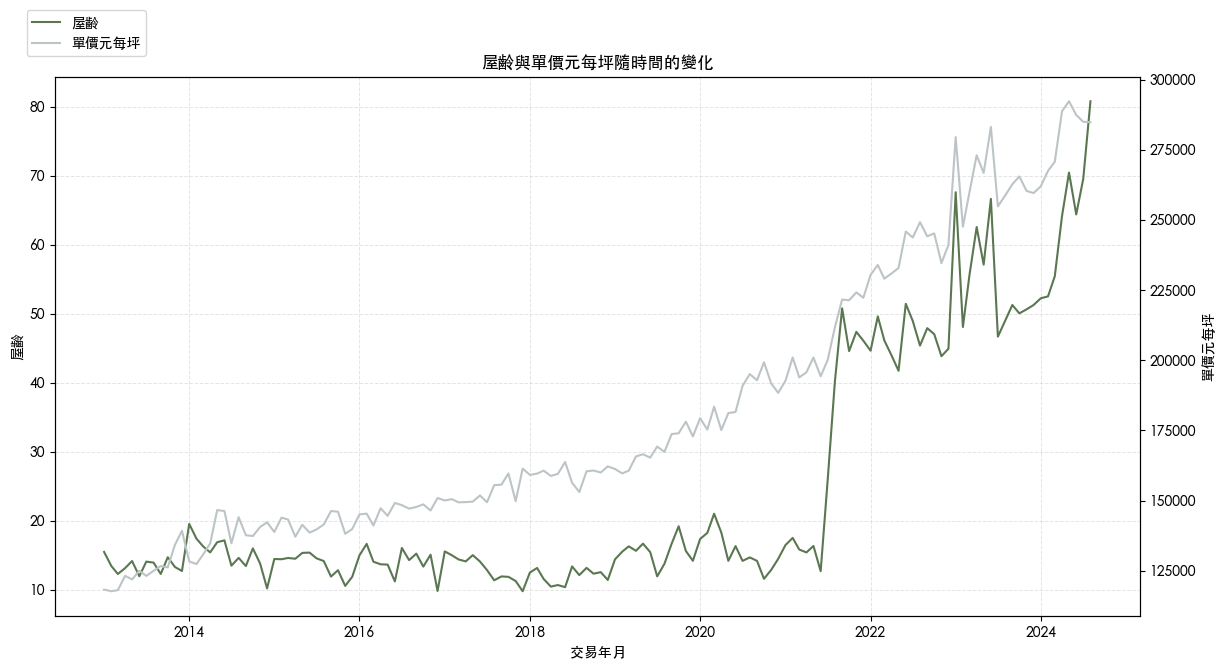

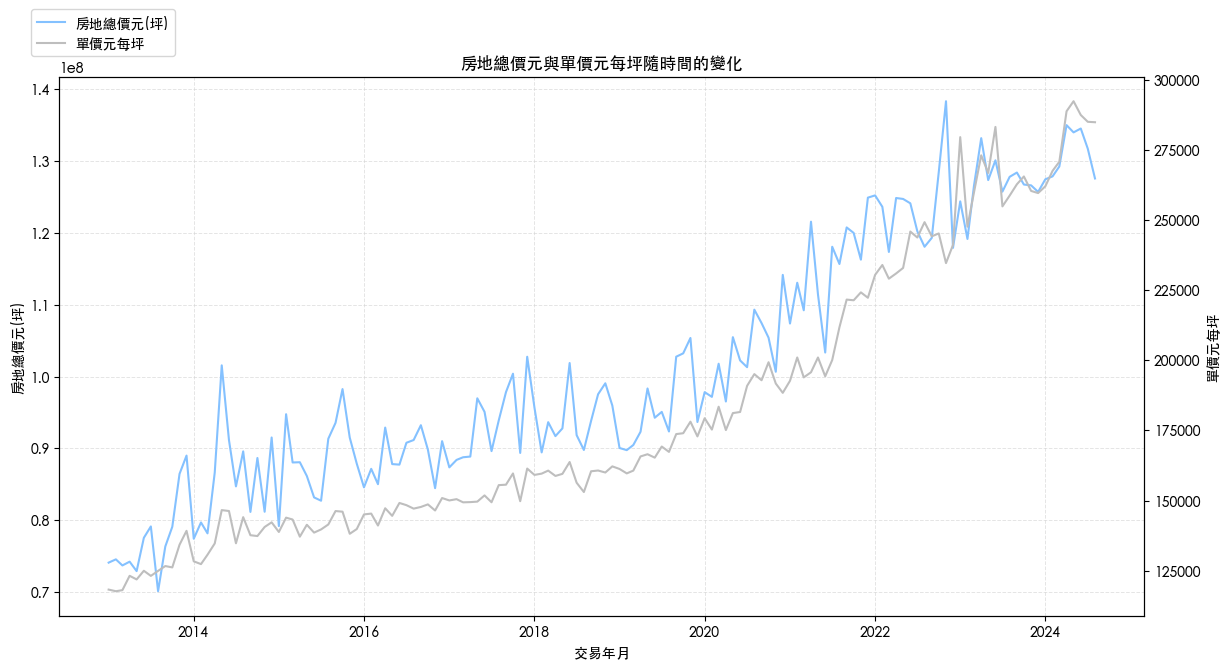

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rcParams['font.family'] = 'Heiti TC'


# 過濾掉2012年資料
df = df[pd.to_datetime(df['交易年月日']).dt.year != 2012]

# 1. 資料按月份聚合
df['交易年月'] = pd.to_datetime(df['交易年月日']).dt.to_period('M').dt.to_timestamp()
grouped = df.groupby('交易年月').agg({
    '屋齡': 'mean',
    '房地總價元(坪)': 'mean',
    '單價元每坪': 'mean'
}).reset_index()

# 2. 繪製第一張雙軸圖：'屋齡' & '單價元每坪'
fig, ax1 = plt.subplots(figsize=(14, 7))
ax2 = ax1.twinx()

ax1.plot(grouped['交易年月'], grouped['屋齡'], color='#5a7751', label='屋齡')
ax2.plot(grouped['交易年月'], grouped['單價元每坪'], color='#bcc4c7', label='單價元每坪')

ax1.set_xlabel('交易年月')
ax1.set_ylabel('屋齡')
ax2.set_ylabel('單價元每坪')

# 優化格線設置
ax1.grid(which='major', color='#D3D3D3', linestyle='--', linewidth=0.7, alpha=0.6)
ax2.grid(False)  # 僅使用主圖表的格線

plt.title('屋齡與單價元每坪隨時間的變化')
fig.legend(loc='lower left', bbox_to_anchor=(0.1, 0.9))
plt.savefig(f"{output_path}屋齡與單價元每坪隨時間的變化_plot.png", dpi=300)
plt.show()

# 3. 繪製第二張雙軸圖：'房地總價元(坪)' & '單價元每坪'
fig, ax1 = plt.subplots(figsize=(14, 7))
ax2 = ax1.twinx()

ax1.plot(grouped['交易年月'], grouped['房地總價元(坪)'], color='#84C1FF', label='房地總價元(坪)')
ax2.plot(grouped['交易年月'], grouped['單價元每坪'], color='#BEBEBE', label='單價元每坪')

ax1.set_xlabel('交易年月')
ax1.set_ylabel('房地總價元(坪)')
ax2.set_ylabel('單價元每坪')

# 優化格線設置
ax1.grid(which='major', color='#D3D3D3', linestyle='--', linewidth=0.7, alpha=0.6)
ax2.grid(False)

plt.title('房地總價元與單價元每坪隨時間的變化')
fig.legend(loc='lower left', bbox_to_anchor=(0.1, 0.9))
plt.savefig(f"{output_path}房地總價元與單價元每坪隨時間的變化_plot.png", dpi=300)
plt.show()


In [10]:
df.columns

Index(['鄉鎮市區', '土地位置建物門牌', '交易年月日', '建築完成年月', '建物移轉總面積平方公尺', '有無管理組織', '總價元',
       '單價元平方公尺', '備註', '編號', '緯度', '經度', 'bad_count', 'good_count', '建築型態清整',
       '陽台有無', '是否含額外土地', '建築型態_住商大樓', '建築型態_公寓', '建築型態_其他', '建築型態_透天厝',
       '房地總價元', '格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間', '是否包含車位', '建材_磚石',
       '建材_鋼筋', '建材_鋼骨', '建材_竹木', '住', '商', '工', '農', '移轉層次_騎樓', '移轉層次_屋頂',
       '移轉層次_一二樓', 'KDE_0.5km', 'KDE_1km', 'KDE_1.5km', '有無電梯', 'Region',
       '建物移轉總面積坪', '單價元每坪', '房地總價元(坪)', '交易年份', '建築完成年', '交易年_民國', '屋齡',
       '屋齡區間', 'good_count_0_500', 'good_count_500_1000',
       'good_count_1000_1500', 'bad_count_0_500', 'bad_count_500_1000',
       'bad_count_1000_1500', 'KDE_class', '交易年月'],
      dtype='object')

In [22]:
df['屋齡區間'].unique

<bound method Series.unique of 0               30年以上
1         21年以上－未滿30年
2         21年以上－未滿30年
3         12年以上－未滿21年
4         21年以上－未滿30年
             ...     
201005          30年以上
201006           未滿3年
201007           未滿3年
201008          30年以上
201009          30年以上
Name: 屋齡區間, Length: 194301, dtype: object>

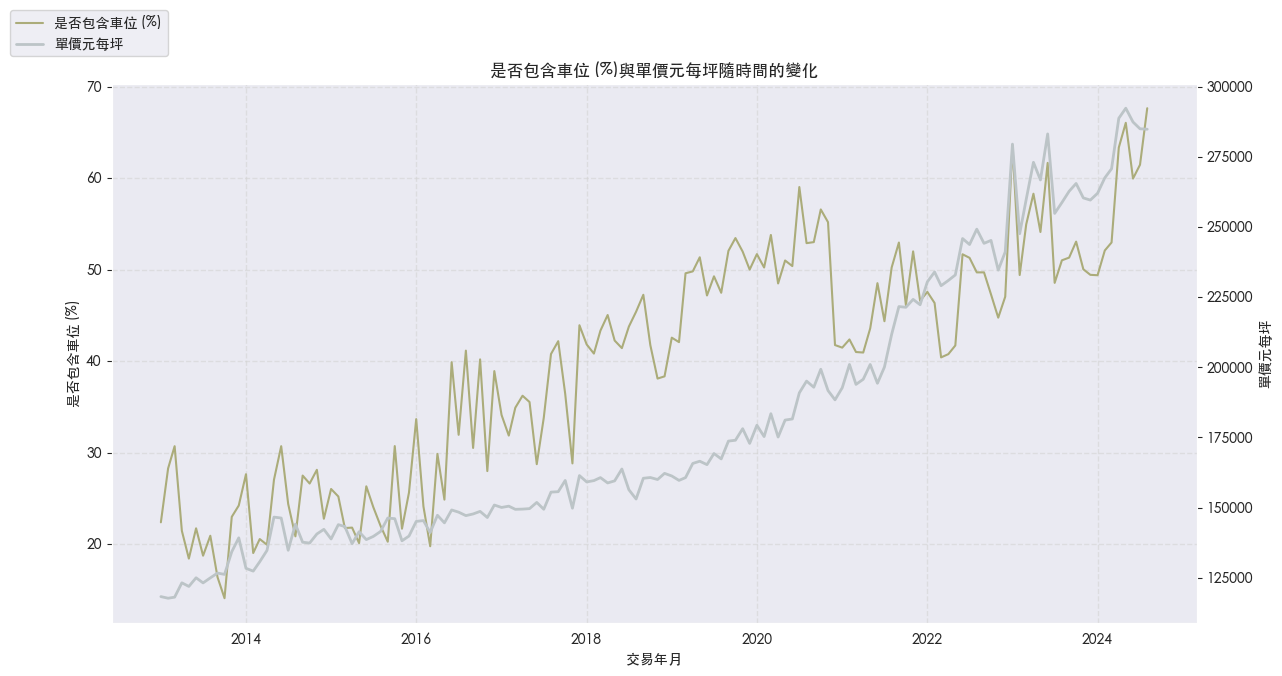

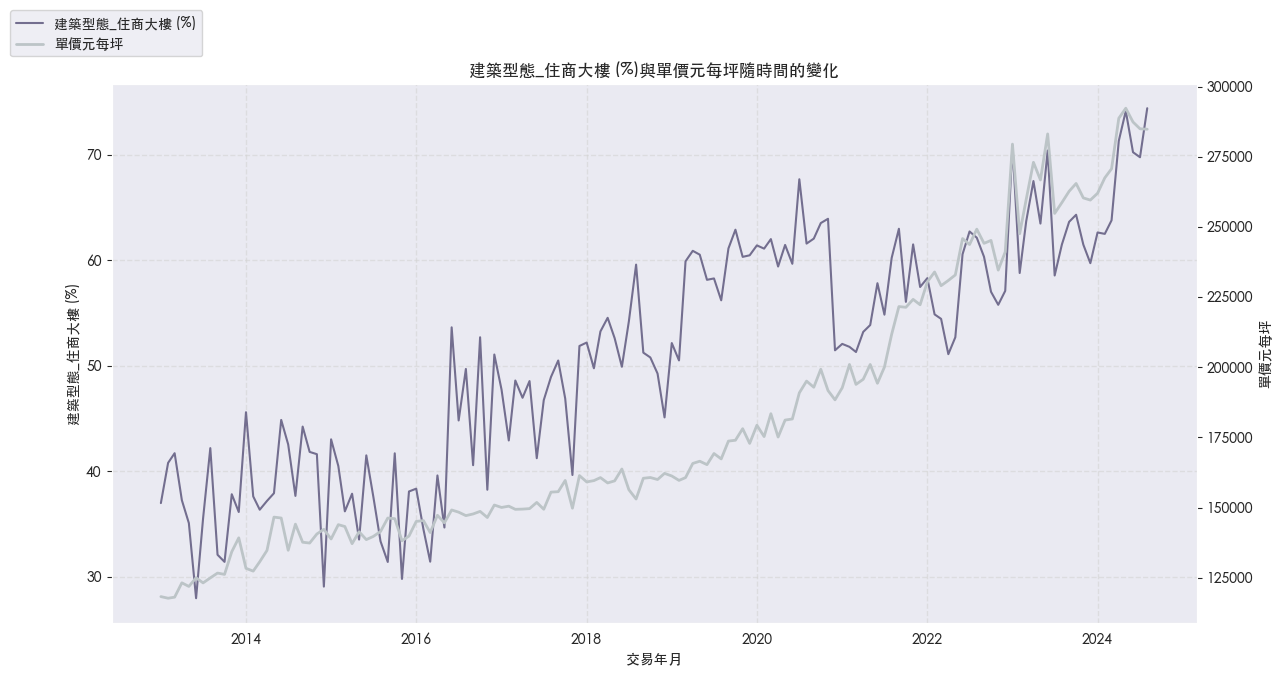

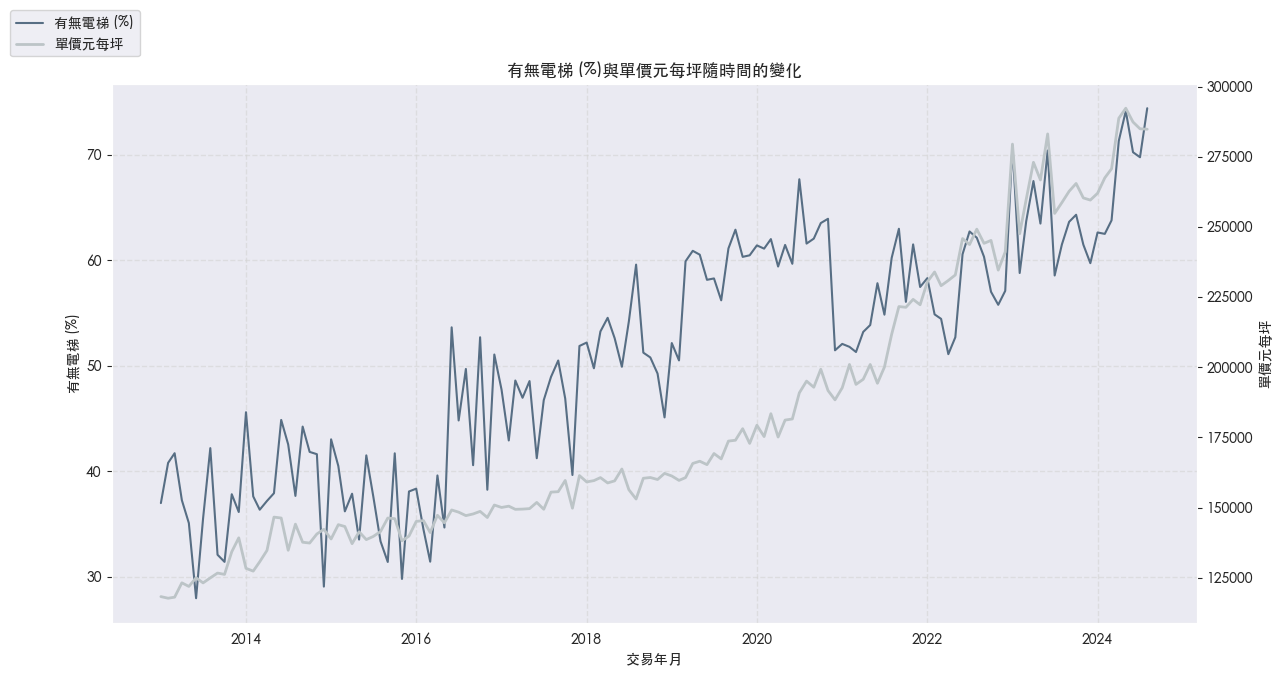

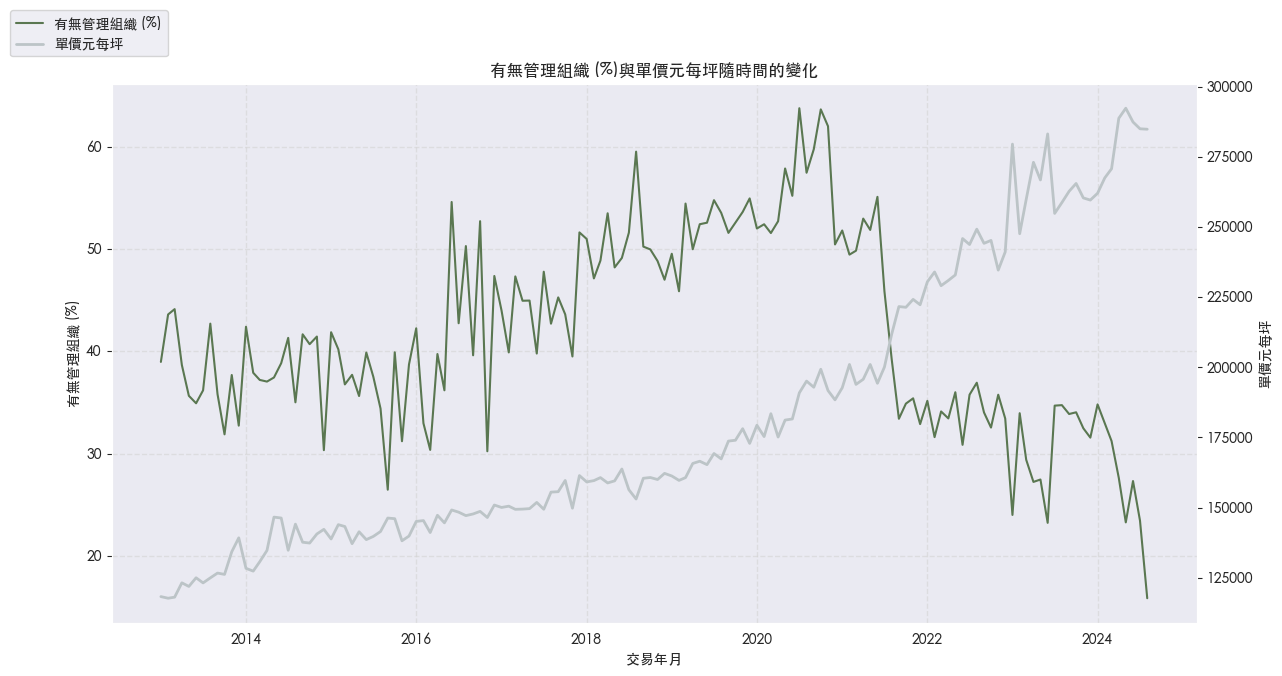

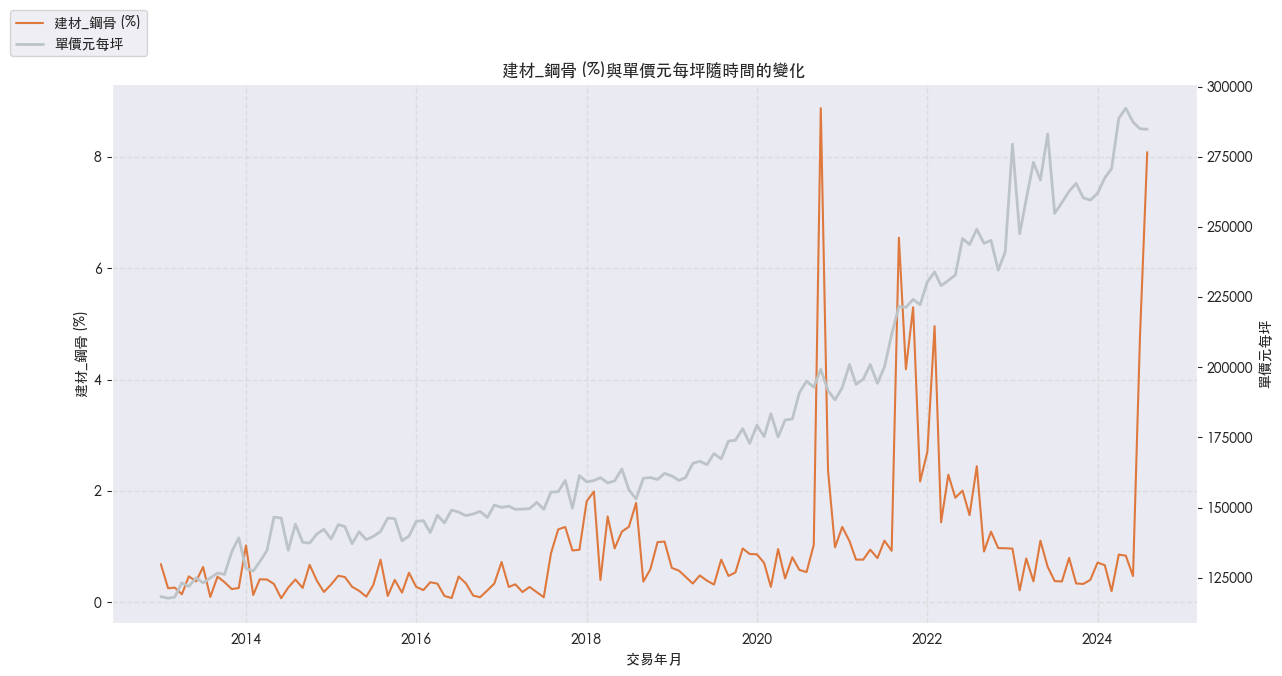

In [13]:
import matplotlib.pyplot as plt

# 設定字體
plt.rcParams['font.family'] = 'Heiti TC'
# 過濾掉2012年資料
df = df[pd.to_datetime(df['交易年月日']).dt.year != 2012]

# 1. 資料按月份聚合
df['交易年月'] = pd.to_datetime(df['交易年月日']).dt.to_period('M').dt.to_timestamp()
grouped = df.groupby('交易年月').agg({
    '是否包含車位': 'mean',
    '建築型態_住商大樓': 'mean',
    '有無電梯': 'mean',
    '有無管理組織': 'mean',
    '建材_鋼骨': 'mean',
    '單價元每坪': 'mean'
}).reset_index()

# 將類別特徵轉換為百分比
for col in ['是否包含車位', '建築型態_住商大樓', '有無電梯', '有無管理組織', '建材_鋼骨']:
    grouped[col] *= 100

# 特徵列表和對應的顏色
features = [
    ('是否包含車位', '#abac7a', '是否包含車位 (%)'),
    ('建築型態_住商大樓', '#736e8f', '建築型態_住商大樓 (%)'),
    ('有無電梯', '#576e84', '有無電梯 (%)'),
    ('有無管理組織', '#5a7751', '有無管理組織 (%)'),
    ('建材_鋼骨', '#de783d', '建材_鋼骨 (%)')
]

# 繪製每個特徵的雙軸圖
for feature, color, label in features:
    fig, ax1 = plt.subplots(figsize=(14, 7))
    ax2 = ax1.twinx()

    # 繪製特徵的趨勢線
    ax1.plot(grouped['交易年月'], grouped[feature], color=color, linewidth=1.5, label=label)

    # 繪製房價趨勢線
    ax2.plot(grouped['交易年月'], grouped['單價元每坪'], color='#bcc4c7', linewidth=2, label='單價元每坪')

    # 設定軸標籤和標題
    ax1.set_xlabel('交易年月')
    ax1.set_ylabel(f'{label}')
    ax2.set_ylabel('單價元每坪')
    plt.title(f'{label}與單價元每坪隨時間的變化')

    # 合併圖例
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', bbox_to_anchor=(-0.1, 1.15))

    # 優化格線設置
    ax1.grid(which='major', color='#D3D3D3', linestyle='--', linewidth=1, alpha=0.6)
    ax2.grid(False)  # 僅使用主圖表的格線

    # 保存圖表
    plt.savefig(f"{output_path}{label}與單價元每坪隨時間的變化_plot.png", dpi=300)
    plt.show()


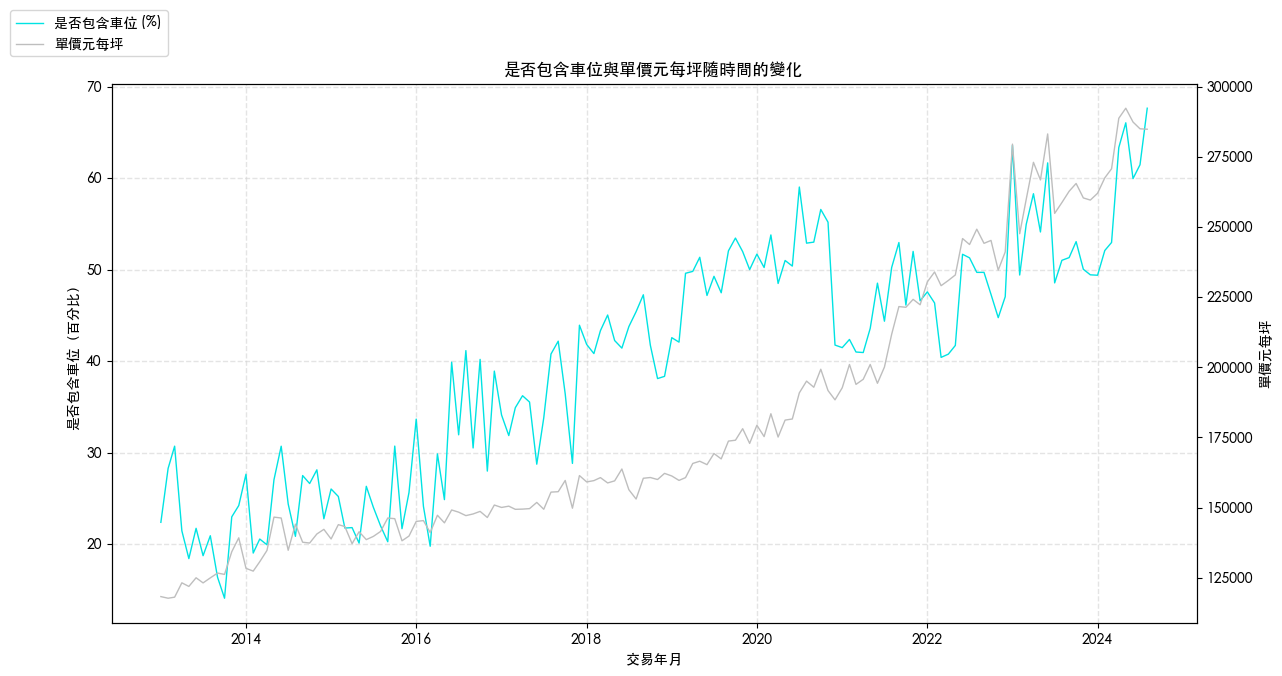

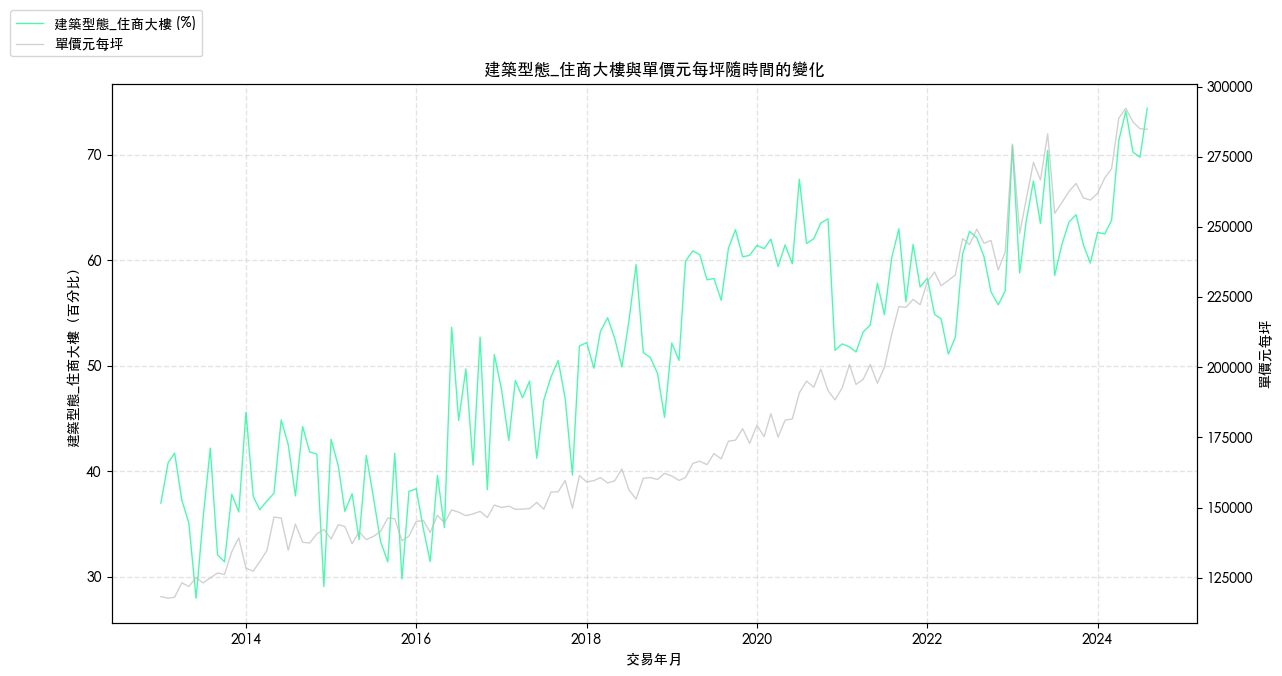

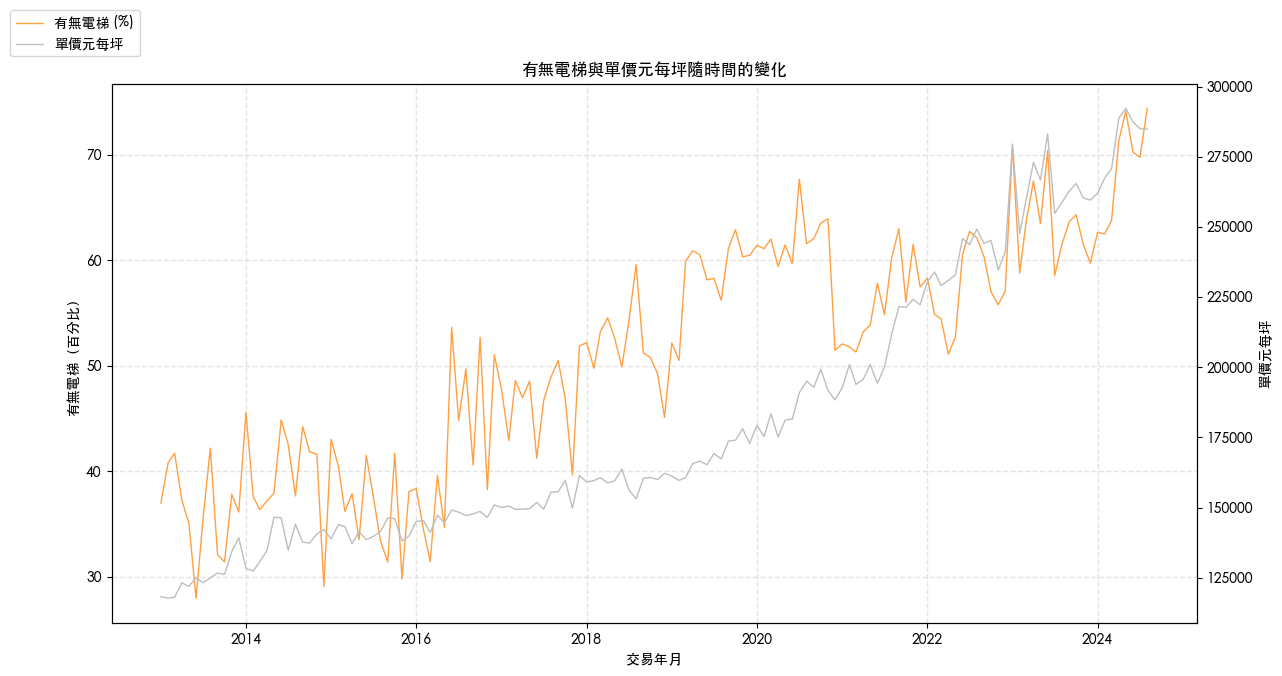

In [ ]:
plt.rcParams['font.family'] = 'Heiti TC'

df = df[pd.to_datetime(df['交易年月日']).dt.year != 2012]

# 1. 資料按月份聚合
df['交易年月'] = pd.to_datetime(df['交易年月日']).dt.to_period('M').dt.to_timestamp()
grouped = df.groupby('交易年月').agg({
    '是否包含車位': 'mean',
    '建築型態_住商大樓': 'mean',
    '有無電梯': 'mean',
    '單價元每坪': 'mean',
    '有無管理組織':'mean',
    '建材_鋼骨':'mean'
}).reset_index()


# 將類別特徵轉換為百分比
grouped['是否包含車位'] *= 100
grouped['建築型態_住商大樓'] *= 100
grouped['有無電梯'] *= 100
grouped['有無管理組織'] *= 100
grouped['建材_鋼骨'] *= 100

# 2. 繪製第一張雙軸圖：'是否包含車位' & '單價元每坪'
fig, ax1 = plt.subplots(figsize=(14, 7))
ax2 = ax1.twinx()

# 類別特徵使用折線圖，增加線條寬度和標記
ax1.plot(grouped['交易年月'], grouped['是否包含車位'], color='#00E3E3', linewidth=1, label='是否包含車位 (%)')

# 目標變數使用折線圖，增加線條寬度和標記
ax2.plot(grouped['交易年月'], grouped['單價元每坪'], color='#BEBEBE', linewidth=1, label='單價元每坪')

ax1.set_xlabel('交易年月')
ax1.set_ylabel('是否包含車位（百分比）')
ax2.set_ylabel('單價元每坪')

ax1.tick_params(axis='y')
ax2.tick_params(axis='y')

plt.title('是否包含車位與單價元每坪隨時間的變化')

# 添加網格線以提高可讀性
# ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# 合併圖例
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
# ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', bbox_to_anchor=(-0.1, 1.15))

# 優化格線設置
ax1.grid(which='major', color='#D3D3D3', linestyle='--', linewidth=1, alpha=0.6)
ax2.grid(False)  # 僅使用主圖表的格線

plt.savefig(f"{output_path}是否包含車位與單價元每坪隨時間的變化_plot.png", dpi=300)
plt.show()

# 3. 繪製第二張雙軸圖：'建築型態_住商大樓' & '單價元每坪'
fig, ax1 = plt.subplots(figsize=(14, 7))
ax2 = ax1.twinx()

ax1.plot(grouped['交易年月'], grouped['建築型態_住商大樓'], color='#02F78E', linewidth=1,alpha=0.7, label='建築型態_住商大樓 (%)')
ax2.plot(grouped['交易年月'], grouped['單價元每坪'], color='#BEBEBE', linewidth=1,alpha=0.7 ,label='單價元每坪')

ax1.set_xlabel('交易年月')
ax1.set_ylabel('建築型態_住商大樓（百分比）')
ax2.set_ylabel('單價元每坪')

ax1.tick_params(axis='y')
ax2.tick_params(axis='y')

plt.title('建築型態_住商大樓與單價元每坪隨時間的變化')

# ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
# ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', bbox_to_anchor=(-0.1, 1.15))
# 優化格線設置
ax1.grid(which='major', color='#D3D3D3', linestyle='--', linewidth=1, alpha=0.6)
ax2.grid(False)  # 僅使用主圖表的格線
plt.savefig(f"{output_path}建築型態_住商大樓與單價元每坪隨時間的變化_plot.png", dpi=300)
plt.show()

# 4. 繪製第三張雙軸圖：'有無電梯' & '單價元每坪'
fig, ax1 = plt.subplots(figsize=(14, 7))
ax2 = ax1.twinx()

ax1.plot(grouped['交易年月'], grouped['有無電梯'], color='#FFA042', linewidth=1, label='有無電梯 (%)')
ax2.plot(grouped['交易年月'], grouped['單價元每坪'], color='#BEBEBE', linewidth=1, label='單價元每坪')

ax1.set_xlabel('交易年月')
ax1.set_ylabel('有無電梯（百分比）')
ax2.set_ylabel('單價元每坪')

ax1.tick_params(axis='y')
ax2.tick_params(axis='y')

plt.title('有無電梯與單價元每坪隨時間的變化')

# ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
# ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', bbox_to_anchor=(-0.1, 1.15))
# 優化格線設置
ax1.grid(which='major', color='#D3D3D3', linestyle='--', linewidth=1, alpha=0.6)
ax2.grid(False)  # 僅使用主圖表的格線
plt.savefig(f"{output_path}有無電梯與單價元每坪隨時間的變化_plot.png", dpi=300)
plt.show()

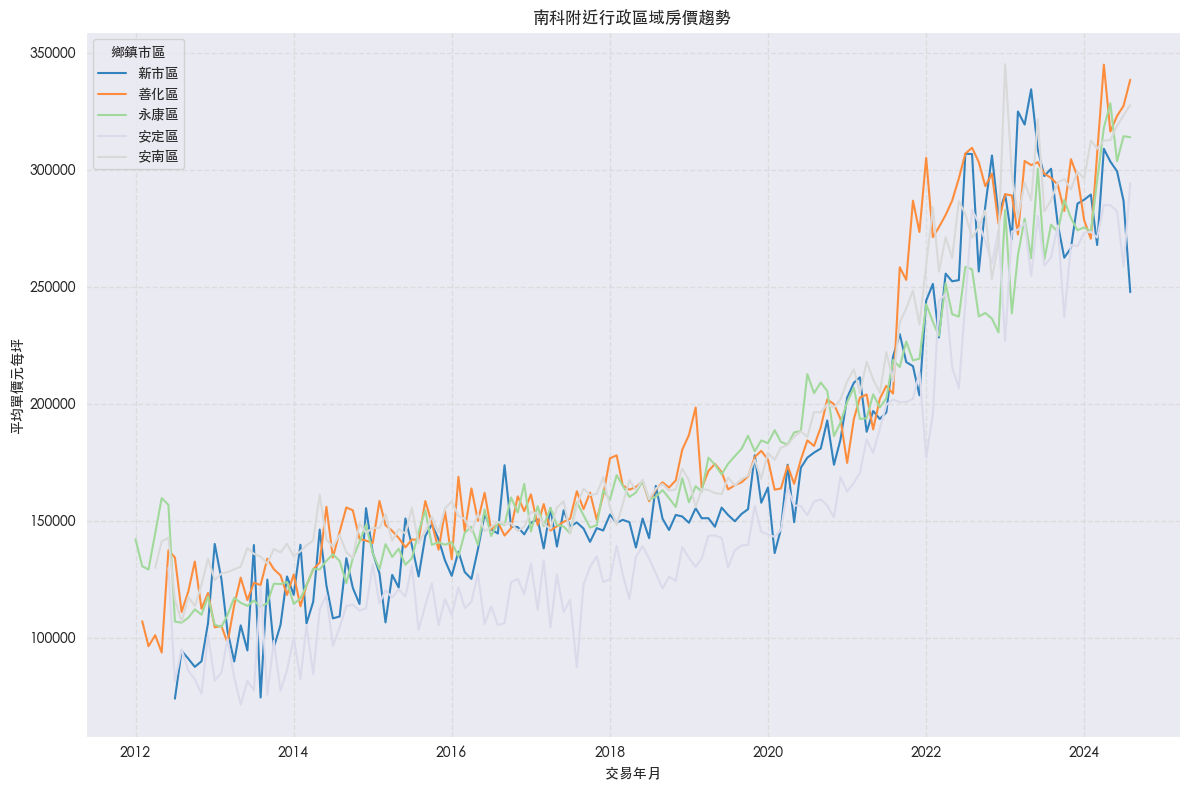

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 假設 df 已包含所有數據，並且包含鄉鎮市區和交易年月日欄位
target = '單價元每坪'
districts = ['新市區', '善化區', '永康區', '安定區', '安南區']

# 1. 提取交易年月（將交易年月日轉換為 YYYY-MM 格式）
df['交易年月'] = pd.to_datetime(df['交易年月日']).dt.to_period('M').dt.to_timestamp()

# 2. 篩選需要的行政區
df_filtered = df[df['鄉鎮市區'].isin(districts)]

# 3. 計算每個行政區在每月中的平均房價
average_price_per_month = df_filtered.groupby(['鄉鎮市區', '交易年月'])[target].mean().unstack(level=0)

# 使用 tab10 調色盤，獲取不同顏色
colors = cm.get_cmap('tab20c', len(districts)) 



# 4. 畫出折線圖
plt.figure(figsize=(12, 8))
for i, district in enumerate(districts):
    plt.plot(
        average_price_per_month.index, 
        average_price_per_month[district], 
        color=colors(i),  
        label=district
    )

# 圖表設置
plt.title('南科附近行政區域房價趨勢')
plt.xlabel('交易年月')
plt.ylabel('平均單價元每坪')
plt.legend(title='鄉鎮市區')
plt.grid(which='major', color='#D3D3D3', linestyle='--', linewidth=1, alpha=0.6)
plt.tight_layout()
# 優化格線設置
output_path = save_dir + "/"
# plt.savefig(f"{save_dir}/整個特徵與房價的相關性_heatmap.png", dpi=300)
plt.savefig(f"{output_path}南科附近行政區域房價趨勢_plot.png", dpi=300)
plt.show()




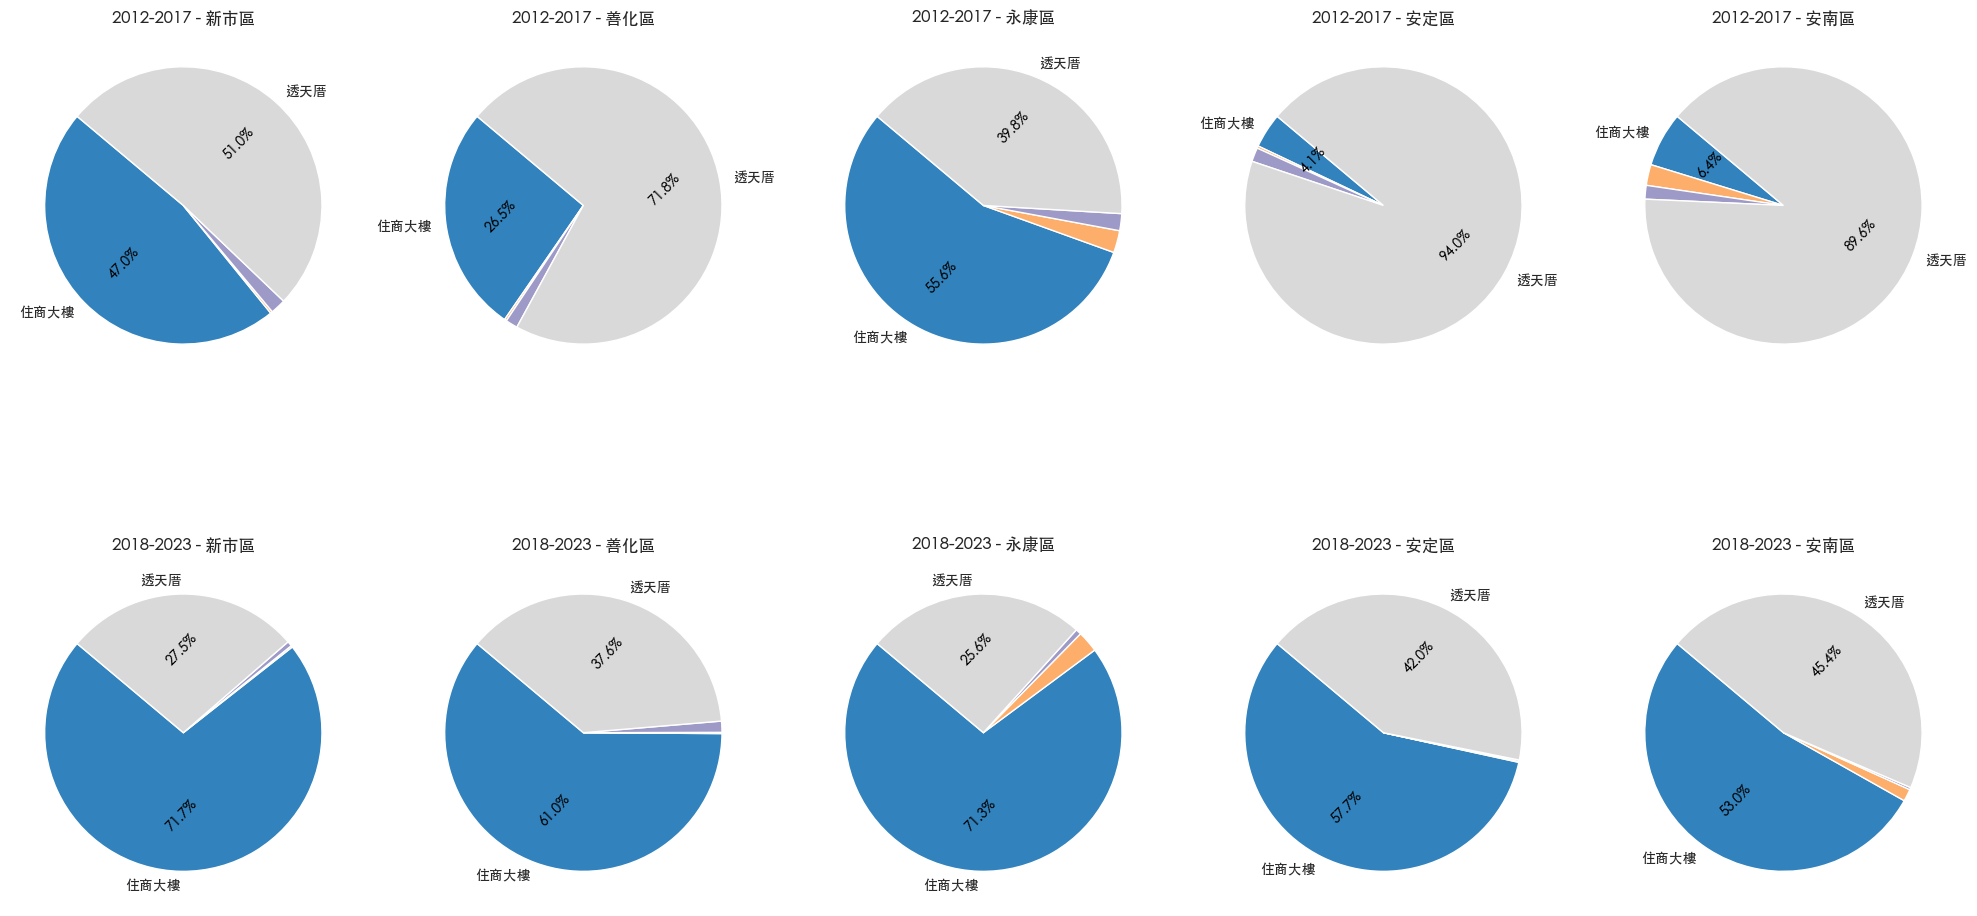

In [9]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 假設 df 已包含所有數據，並且包含 one-hot 編碼的建築型態欄位
districts = ['新市區', '善化區', '永康區', '安定區', '安南區']
building_types = ['建築型態_住商大樓', '建築型態_公寓', '建築型態_其他', '建築型態_透天厝']
new_labels = ['住商大樓', '公寓', '其他', '透天厝']

# 設置兩個時段
time_periods = {
    '2012-2017': ('2012-01-01', '2017-12-31'),
    '2018-2023': ('2018-01-01', '2023-12-31')
}

# 設置顏色映射
cmap = cm.get_cmap('tab20c', len(building_types))

# 繪製每個時段的子圖
fig, axes = plt.subplots(len(time_periods), len(districts), figsize=(20, 12))

# 對每個時段分別進行分析
for row, (period_name, (start_date, end_date)) in enumerate(time_periods.items()):
    # 篩選出當前時段的數據
    period_data = df[(df['交易年月日'] >= start_date) & (df['交易年月日'] <= end_date)]
    
    # 對每個行政區域繪製圓餅圖
    for col, district in enumerate(districts):
        # 篩選出當前區域的數據
        district_data = period_data[period_data['鄉鎮市區'] == district]
        
        # 計算每種建築型態的總數
        building_type_counts = district_data[building_types].sum()
        building_type_counts.index = new_labels  # 將 index 重命名為簡潔名稱
        
        # 找出前兩大值
        sorted_counts = building_type_counts.sort_values(ascending=False)
        top_two_indices = sorted_counts.index[:2]  # 取得前兩大類型的索引
        
        # 設定標籤：僅保留前兩大的標籤，其他設為空
        labels = [label if label in top_two_indices else '' for label in building_type_counts.index]
        
        # 繪製該區域的圓餅圖，並應用顏色映射
        wedges, texts, autotexts = axes[row, col].pie(
            building_type_counts, 
            labels=labels, 
            autopct=lambda pct: f'{pct:.1f}%' if pct > 0 else '',  # 僅顯示前兩大的百分比標籤
            startangle=140,
            colors=[cmap(i) for i in range(len(building_types))]
        )
        
        # 僅顯示前兩大的數字標籤
        for i, autotext in enumerate(autotexts):
            if building_type_counts.index[i] not in top_two_indices:
                autotext.set_text('')  # 將其他數字標籤設為空
            
            # 調整顯示的格式
            autotext.set_color('black')
            autotext.set_fontsize(10)
            autotext.set_rotation(45)

        # 設定標題
        axes[row, col].set_title(f'{period_name} - {district}')

# 調整圖表佈局
plt.tight_layout()
plt.savefig(f"{output_path}南科附近行政區域房子類型佔比_pie.png", dpi=300)
plt.show()


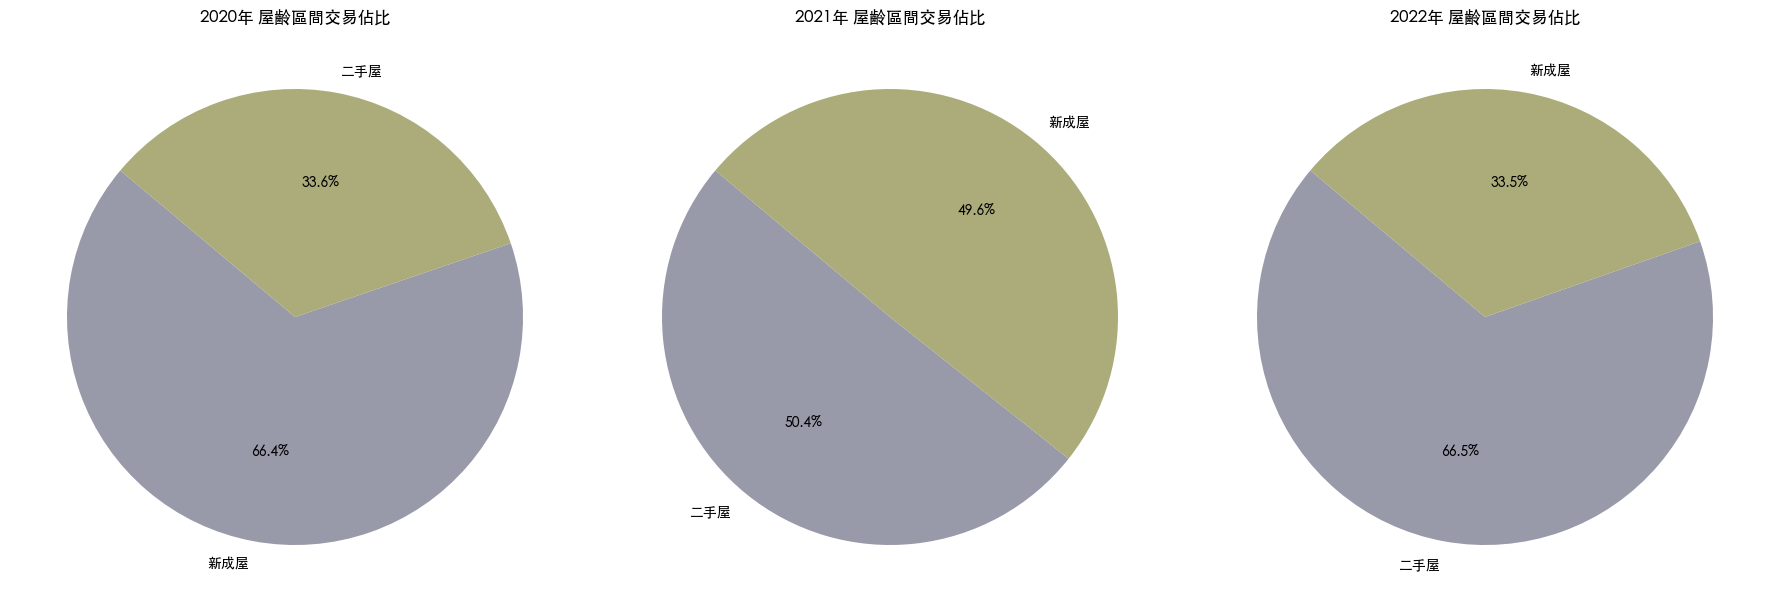

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# 將交易日期轉換為日期格式
df['交易年月日'] = pd.to_datetime(df['交易年月日'])

# 設定年份
years = [2020, 2021, 2022]

# 設定顏色
colors = ['#9899a9','#abac7a']

# 創建子圖
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 逐年繪製圓餅圖
for i, year in enumerate(years):
    # 篩選出該年的數據
    df_year = df[df['交易年月日'].dt.year == year]
    
    # 將「未滿3年」和「3年以上-未滿12年」合併為「新成屋」，其餘為「二手屋」
    age_group_counts = df_year['屋齡區間'].apply(lambda x: '新成屋' if x in ['未滿3年', '3年以上－未滿12年'] else '二手屋').value_counts(normalize=True) * 100
    
    # 繪製圓餅圖
    axes[i].pie(age_group_counts, autopct='%1.1f%%', startangle=140, colors=colors, labels=age_group_counts.index)
    axes[i].set_title(f'{year}年 屋齡區間交易佔比')

# 調整圖表佈局
plt.tight_layout()
plt.show()



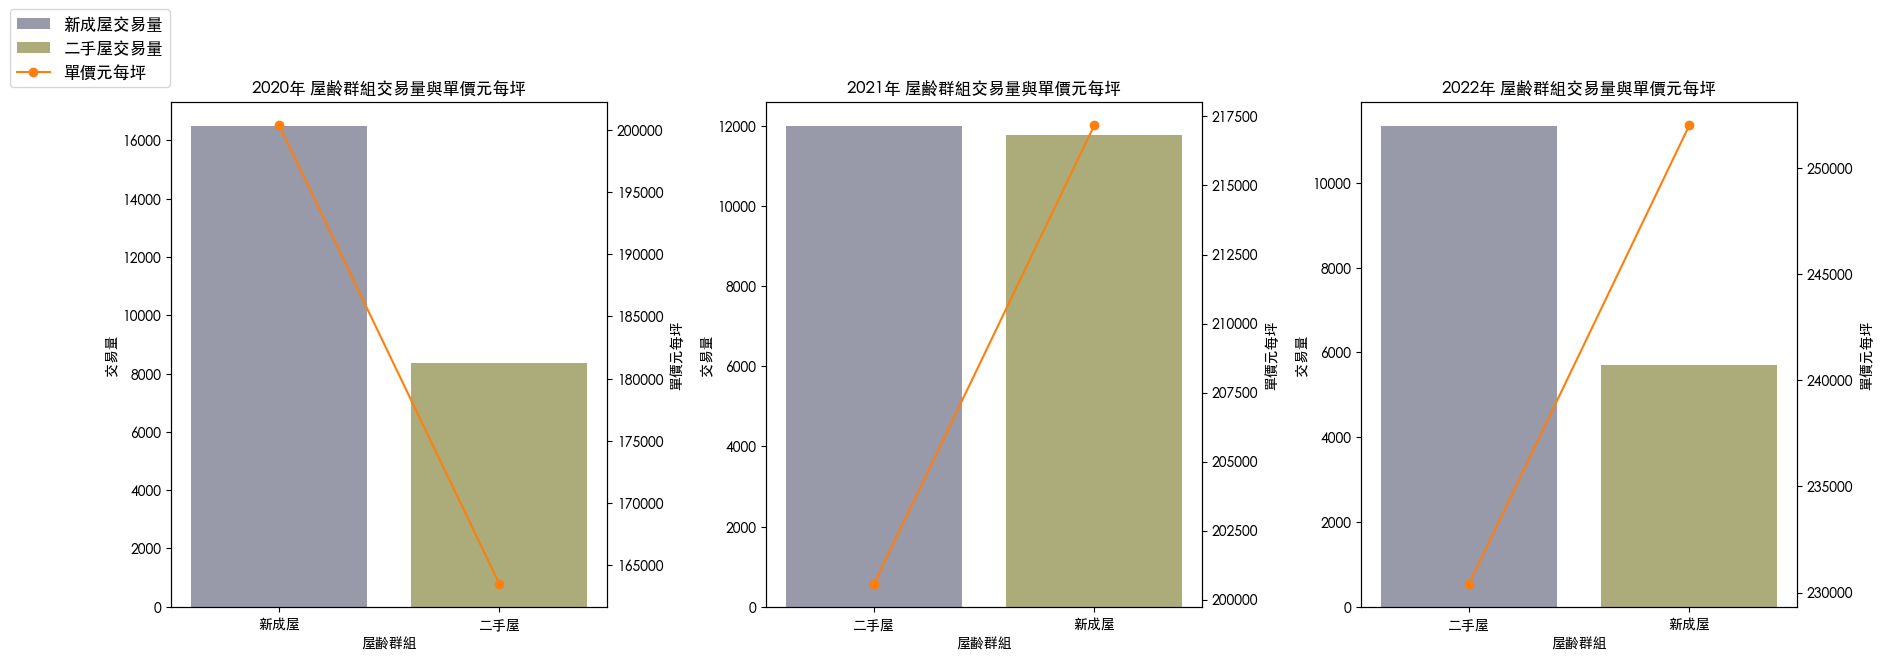

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# 將交易日期轉換為日期格式
df['交易年月日'] = pd.to_datetime(df['交易年月日'])

# 設定年份
years = [2020, 2021, 2022]

# 設定顏色
bar_colors = ['#9899a9', '#abac7a']  # 用於「新成屋」和「二手屋」的交易量直方圖顏色
line_color = '#ff7f0e'  # 用於「單價元每坪」折線圖的顏色

# 創建子圖
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

# 初始化圖例句柄和標籤
legend_handles = []
legend_labels = []

# 逐年繪製直方圖和折線圖
for i, year in enumerate(years):
    # 篩選出該年的數據
    df_year = df[df['交易年月日'].dt.year == year]
    
    # 將「未滿3年」和「3年以上-未滿12年」合併為「新成屋」，其餘為「二手屋」
    df_year['屋齡群組'] = df_year['屋齡區間'].apply(lambda x: '新成屋' if x in ['未滿3年', '3年以上－未滿12年'] else '二手屋')
    
    # 計算每個群組的交易量
    transaction_counts = df_year['屋齡群組'].value_counts()

    # 計算每個群組的「單價元每坪」平均值
    avg_price_per_group = df_year.groupby('屋齡群組')['單價元每坪'].mean()

    # 繪製直方圖（交易量）
    ax1 = axes[i]
    bars = ax1.bar(transaction_counts.index, transaction_counts.values, color=bar_colors)
    ax1.set_xlabel('屋齡群組')
    ax1.set_ylabel('交易量')
    ax1.set_title(f'{year}年 屋齡群組交易量與單價元每坪')
    ax1.tick_params(axis='y')

    # 創建第二個 y 軸
    ax2 = ax1.twinx()
    line, = ax2.plot(avg_price_per_group.index, avg_price_per_group.values, color=line_color, marker='o', label='單價元每坪')
    ax2.set_ylabel('單價元每坪')
    ax2.tick_params(axis='y')

    # 只在第一個子圖中收集圖例句柄和標籤
    if i == 0:
        legend_handles.extend(bars)
        legend_handles.append(line)
        legend_labels = ['新成屋交易量', '二手屋交易量', '單價元每坪']

# 在整張圖的左上角添加單一的圖例
fig.legend(legend_handles, legend_labels, loc='lower right', bbox_to_anchor=(0.05, 0.95), fontsize=12)

# 調整圖表佈局
plt.tight_layout()
plt.show()


In [ ]:
# 創建一個函數，根據 One-Hot 編碼欄位的值返回類別標籤
def get_building_type(row):
    if row['移轉層次_騎樓'] == 1:
        return '騎樓'
    elif row['移轉層次_屋頂'] == 1:
        return '屋頂'
    elif row['移轉層次_一二樓'] == 1:
        return '一二樓'
    else:
        return '未知'

# 應用函數，創建新的類別型欄位
df['移轉層次'] = df.apply(get_building_type, axis=1)



In [ ]:
# 創建一個函數，根據 One-Hot 編碼欄位的值返回類別標籤
def get_building_type(row):
    if row['建築型態_住商大樓'] == 1:
        return '住商大樓'
    elif row['建築型態_公寓'] == 1:
        return '公寓'
    elif row['建築型態_透天厝'] == 1:
        return '透天厝'
    elif row['建築型態_其他'] == 1:
        return '其他'
    else:
        return '未知'

# 應用函數，創建新的類別型欄位
df['建築型態'] = df.apply(get_building_type, axis=1)



In [ ]:
# 定義函數，根據 One-Hot 編碼欄位返回建材類別
def get_material_type(row):
    if row['建材_磚石'] == 1:
        return '磚石'
    elif row['建材_鋼筋'] == 1:
        return '鋼筋'
    elif row['建材_鋼骨'] == 1:
        return '鋼骨'
    elif row['建材_竹木'] == 1:
        return '竹木'
    else:
        return '未知'  # 處理可能的缺失值或異常值

# 應用函數，創建新的類別型欄位
df['建材種類'] = df.apply(get_material_type, axis=1)



In [ ]:
# 定義函數，根據 One-Hot 編碼欄位返回土地用途類別
def get_land_use_type(row):
    if row['住'] == 1:
        return '住'
    elif row['商'] == 1:
        return '商'
    elif row['工'] == 1:
        return '工'
    elif row['農'] == 1:
        return '農'
    else:
        return '未知'  # 處理可能的缺失值或異常值

# 應用函數，創建新的類別型欄位
df['土地用途'] = df.apply(get_land_use_type, axis=1)

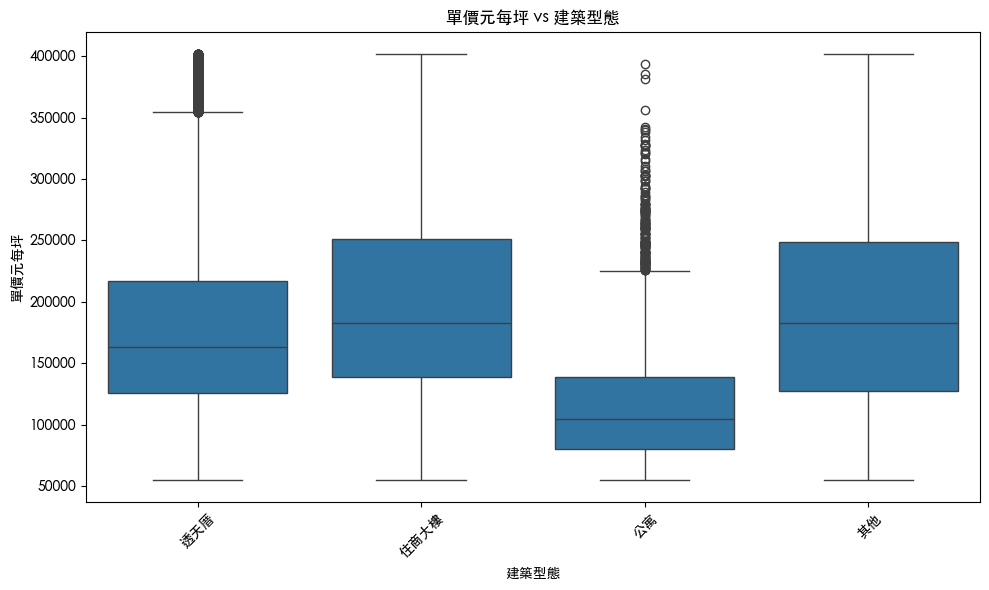

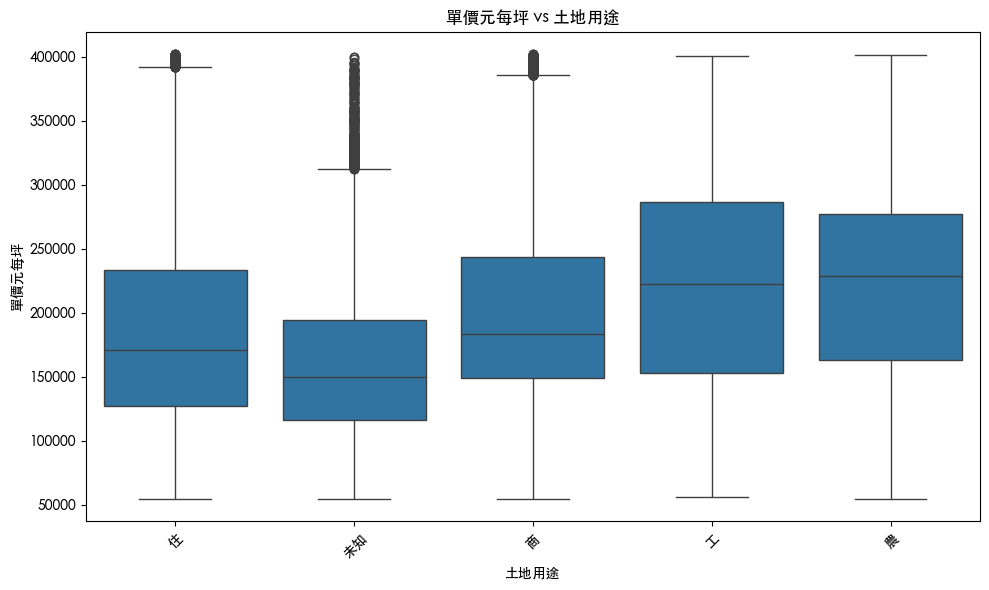

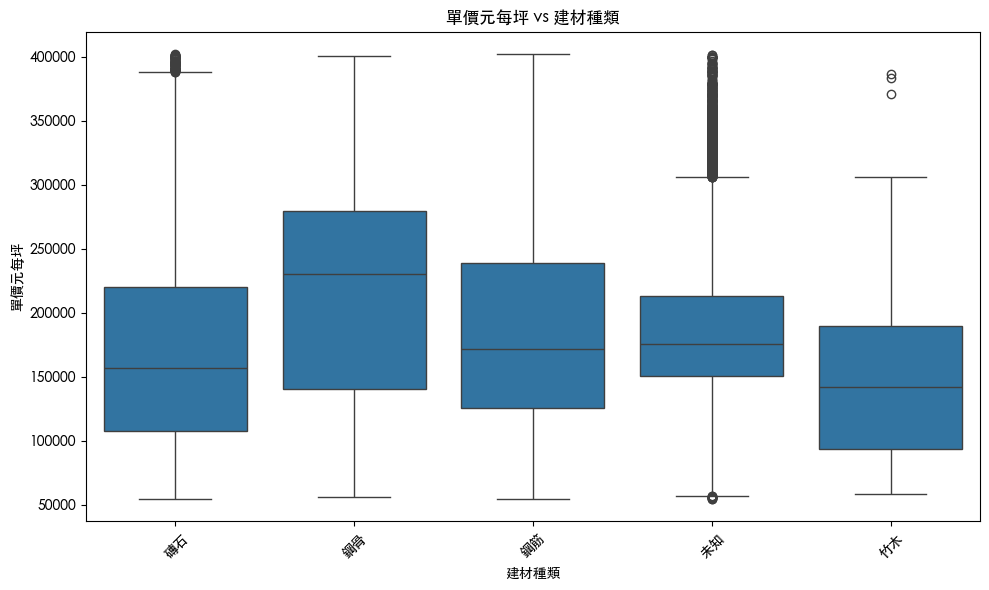

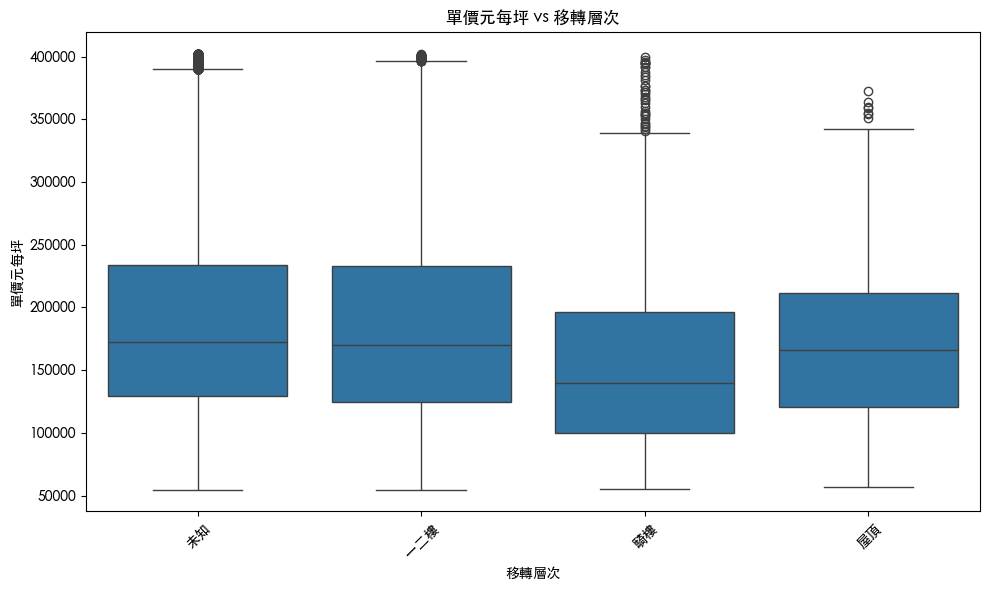

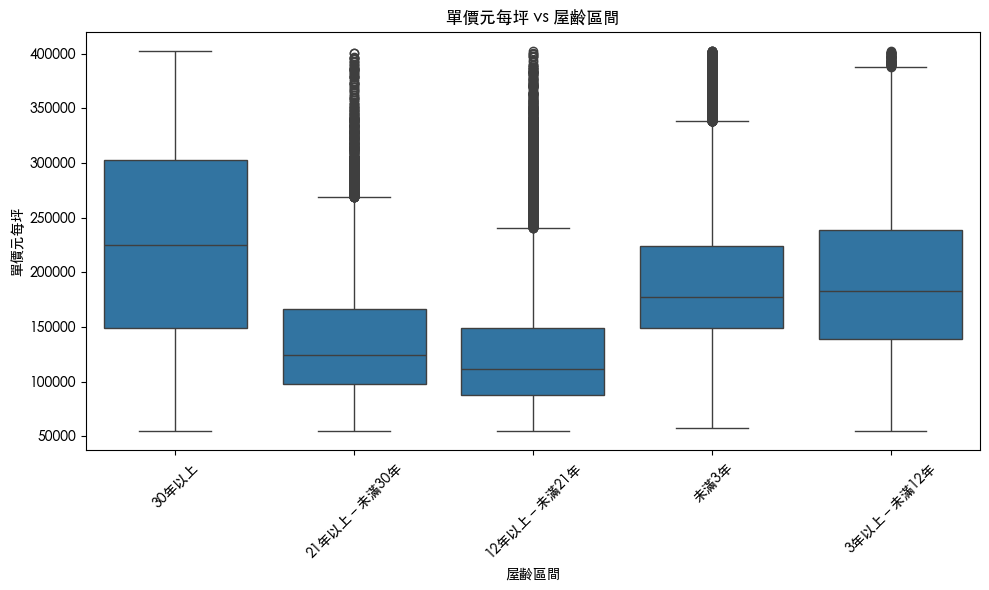

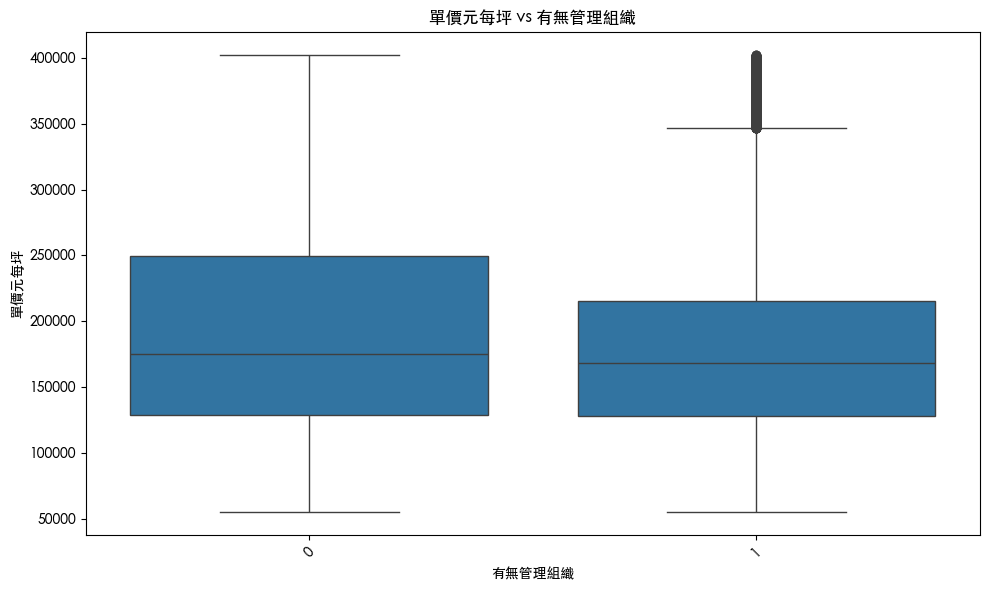

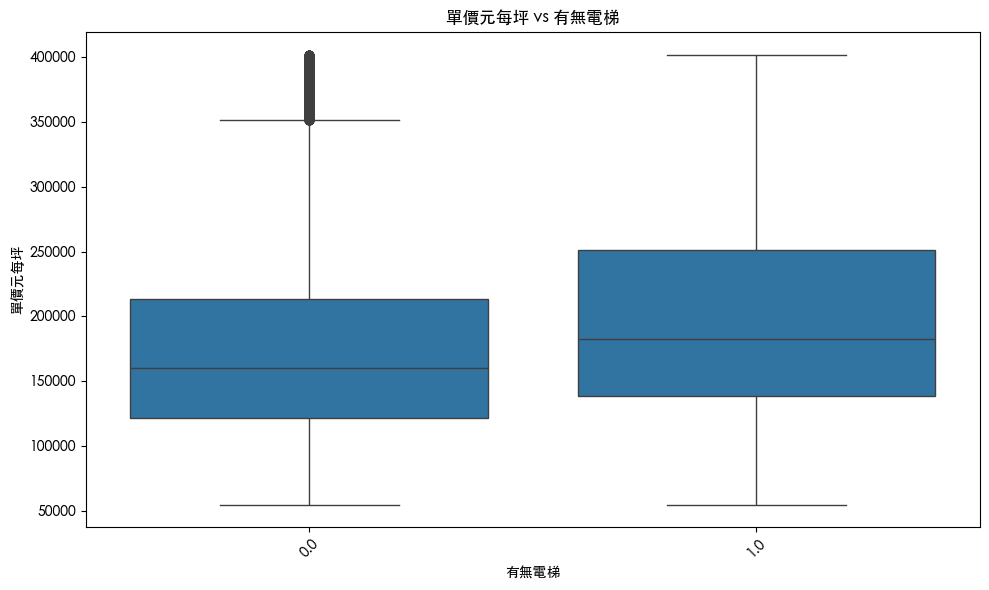

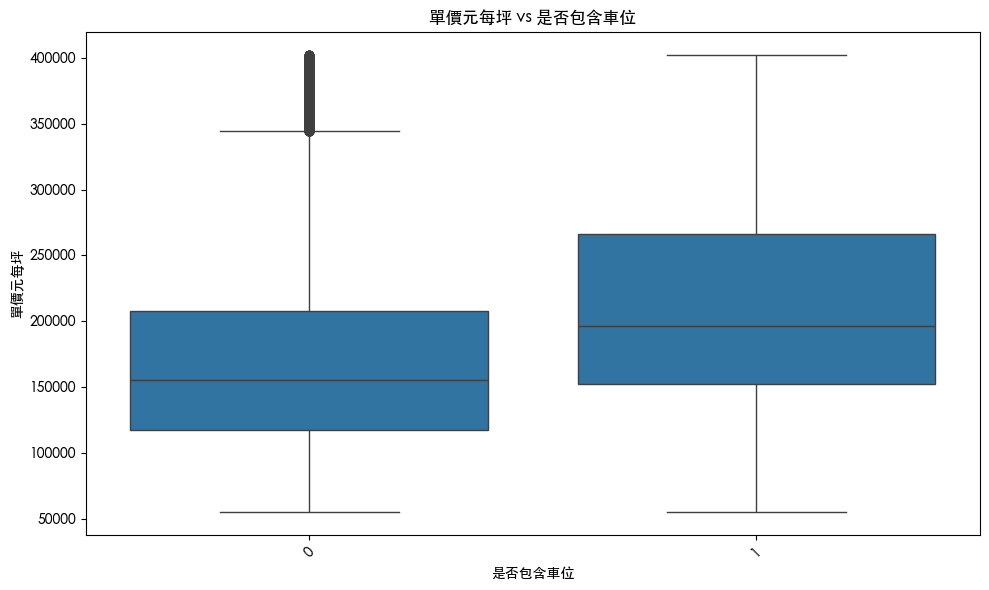

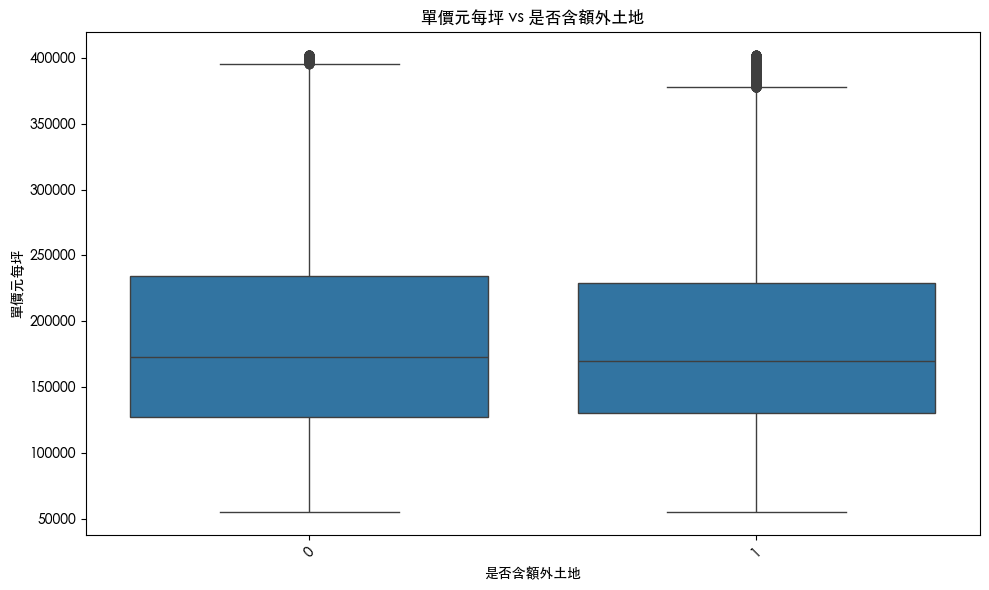

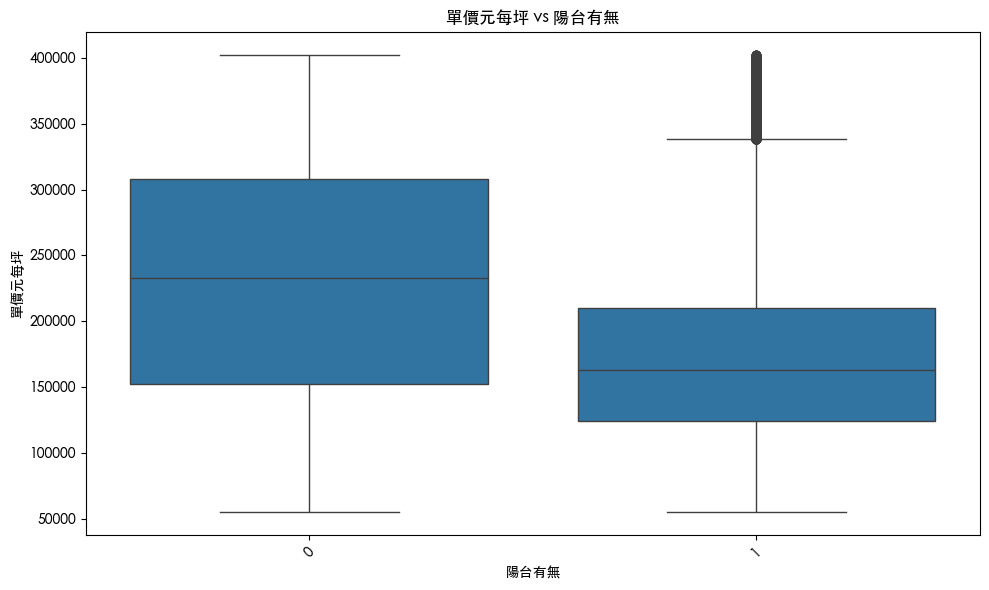

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 定義需要比較的分類變數
categorical_vars = [
    '建築型態', '土地用途','建材種類','移轉層次','屋齡區間','有無管理組織', '有無電梯', '是否包含車位', '是否含額外土地','陽台有無'
]

# 遍歷每個分類變數，繪製對應的 Boxplot
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=var, y='單價元每坪')
    plt.title(f'單價元每坪 vs {var}')
    plt.xlabel(var)
    plt.ylabel('單價元每坪')
    plt.xticks(rotation=45)  # 如果分類變數有多個類別，可以選擇旋轉 x 軸標籤
    plt.tight_layout()
    plt.savefig(f"{output_path}outoutlier_{var}_regplot.png", dpi=300)
    plt.show()